# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

2024-09-09 13:37:09.422718: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-09 13:37:09.423923: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-09 13:37:09.430076: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-09 13:37:09.513630: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 13:37:11.444102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
###tma.clear_directory(text_curater="RF_BL", directory="nfault") #, not_text=[]

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

Preparing to delete 154 files
First 10 file names to be deleted
-------------------------------------------------
['/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(e42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(d42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(r42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(s42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/artificial_tree/RF_BL(t42)_AP(0.05-0.1-0.3-0.2)_911.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/audiology/RF_BL(r42)_AP(0.05-0.1-0.3-0.2)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/audiology/RF_BL(s42)_AP(0.05-0.1-0.3-0.2)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/audiology/RF_BL(e42)_AP(0.05-0.1-0.3-

True

In [8]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="optdigits.csv", split= "even", percent_of_anchors= [0.05], verbose=2, random_state= 1738)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_RF_SPUD_tests()
#test.run_DIG_tests(predict = False, page_ranks=["None"])
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
#test.run_JLMA_tests()
#test.run_PCR_tests()
#test.run_DIG_Conections_tests(page_ranks=["None"], predict = False)
#test.run_CSPUD_tests(operations= ["log", "sqrt", "normalize"])
#test.run_MALI_tests()
#test.run_RF_MASH_tests()
#test.run_KEMA_tests()
#emb1 = test.run_RF_BL_tests()


 
 
---------------------------       Initalizing class with optdigits.csv data       ---------------------------

MDS initialized with 32 components
The knn values are: (2, 79, 156, 233, 310, 387, 464, 541, 618, 695)


### Original Data

In [3]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame(directory = "default")

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Fix DataFrame if it was bad values
df = df[~(df["Percent_of_Anchors"].astype(float) > 0.5)]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As

In [6]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [6]:
subset_df(df, seed = 42)#.sample(5)

csv_file method  seed   split   KNN  Percent_of_KNN  \
540971   ecoli_5   NAMA    42  skewed   NaN             NaN   
1175066     iris  CwDIG    42  random   2.0            0.01   
1175067     iris  CwDIG    42  random   6.0            0.03   
1175068     iris  CwDIG    42  random  10.0            0.05   
1175069     iris  CwDIG    42  random  14.0            0.07   
...          ...    ...   ...     ...   ...             ...   
1517755  S-curve   SSMA    42    even  47.0            0.19   
1517756  S-curve   SSMA    42    even  47.0            0.19   
1517757  S-curve   SSMA    42    even  47.0            0.19   
1517758  S-curve   SSMA    42    even  47.0            0.19   
1517759  S-curve   SSMA    42    even  47.0            0.19   

         Percent_of_Anchors Page_Rank  t_value  Predicted_Feature_MAE  \
540971                 0.10       NaN      NaN                    NaN   
1175066                0.50      None     -1.0                    NaN   
1175067                0.50      None     -1.0                    NaN   
1175068                0.50      None     -1.0                    NaN   
1175069                0.50      None     -1.0                    NaN   
...                     ...       ...      ...                    ...   
1517755                0.05       NaN      NaN                    NaN   
1517756                0.10       NaN      NaN                    NaN   
1517757                0.15       NaN      NaN                    NaN   
1517758                0.20       NaN      NaN                    NaN   
1517759                0.30       NaN      NaN                    NaN   

        Operation SPUDS_Algorithm   FOSCTTM  Cross_Embedding_KNN  \
540971        NaN             NaN       NaN                  NaN   
1175066        10             NaN  0.063778             0.760000   
1175067        10             NaN  0.079356             0.786667   
1175068        10             NaN  0.088778             0.826667   
1175069        10             NaN  0.078289             0.793333   
...           ...             ...       ...                  ...   
1517755       NaN             NaN  0.352290             0.328571   
1517756       NaN             NaN  0.433368             0.340909   
1517757       NaN             NaN  0.309584             0.456522   
1517758       NaN             NaN  0.300868             0.412500   
1517759       NaN             NaN  0.286361             0.415385   

         A_Classification_Score  B_Classification_Score  Combined_Metric  
540971                 0.914373                0.914373              NaN  
1175066                0.840000                0.920000         0.696222  
1175067                0.893333                0.906667         0.707311  
1175068                0.880000                0.900000         0.737889  
1175069                0.880000                0.900000         0.715044  
...                         ...                     ...              ...  
1517755                     NaN                     NaN        -0.023719  
1517756                     NaN                     NaN        -0.092459  
1517757                     NaN                     NaN         0.146938  
1517758                     NaN                     NaN         0.111632  
1517759                     NaN                     NaN         0.129024  

[153 rows x 17 columns]

### RF Data

In [2]:
#Veiwing with DataFrame
rf_df = tma.upload_to_DataFrame(directory = "Not_default")

#Add a combined metric to help see (The closer to 1 the better)
rf_df["Combined_Metric"] = rf_df["Cross_Embedding_KNN"] - rf_df["FOSCTTM"]

#Fix DataFrame if it was bad values
rf_df = rf_df[~(rf_df["Percent_of_Anchors"].astype(float) > 0.5)]

#Save the Data Frame
rf_df.to_csv(os.getcwd()[:-12] + "ManifoldData_RF/Data_DataFrame.csv", index=False, na_rep='NaN')

File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/optdigits/MASH_RF(r1738)_DTM(hellinger)_AP(0.05-0.1-0.3-0.2)_695.npy is missing FOSCTTM or Cross_Embedding Score
File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/optdigits/MASH_RF(r1738)_DTM(kl)_AP(0.05-0.1-0.3-0.2)_695.npy is missing FOSCTTM or Cross_Embedding Score
File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/optdigits/MASH_RF(r1825)_DTM(kl)_AP(0.05-0.1-0.3-0.2)_695.npy is missing FOSCTTM or Cross_Embedding Score
File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData_RF/optdigits/MASH_RF(r1825)_DTM(hellinger)_AP(0.05-0.1-0.3-0.2)_695.npy is missing FOSCTTM or Cross_Embedding Score


In [7]:
#If there is no new data, we could just read in the old csvfile
rf_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData_RF/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [5]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 1232967


 Method        Lengths
--------      ----------
 JLMA:          67022
 CwDIG:          482420
 MAGAN:          4728
 SSMA:          54720
 DTA:          69680
 Nama:          5437
 SPUD:          316188
 DIG:          180236


----------------------       Splits      ----------------------
Total data of random: 386232

 random        Lengths
--------      ----------
 MAGAN:          1172
 SSMA:          12428
 CwDIG:          198020
 JLMA:          12528
 DTA:          12428
 Nama:          1232
 SPUD:          76202
 DIG:          59694


Total data of even: 216713

 even        Lengths
--------      ----------
 MAGAN:          1315
 SSMA:          14658
 CwDIG:          78240
 JLMA:          13658
 DTA:          14608
 Nama:          1458
 SPUD:          55088
 DIG:   

In [4]:
# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other
grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(
    csv_count=('csv_file', 'nunique'),   # Count occurrences of each seed
    method_count=('method', 'nunique')  # Count unique methods using each seed
).reset_index()

grouped["seed"].values

/tmp/ipykernel_368211/2174829191.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "random").groupby(['seed']).agg(


array([  42, 1738, 1825, 2830, 3407, 3430, 5198, 7667, 9515])

In [5]:
grouped#["method_count", "seeds"]

seed  csv_count  method_count
0    42          1             1
1  1738         30             9
2  1825         30             9
3  2830         30             9
4  3407         30             9
5  3430         30             9
6  5198         30             9
7  7667         30             9
8  9515         30             9

# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

In [60]:
thing = subset_df(rf_df, csv_file = 'iris')
thing.sample(5)

csv_file   method  seed   split KNN_x  Percent_of_KNN  \
178343     iris  SPUD_RF  2830    even    10            0.05   
189302     iris  SPUD_RF  2830  skewed    30            0.15   
181477     iris  SPUD_RF  1738  random    30            0.15   
181637     iris  SPUD_RF  1825    even    10            0.05   
184293     iris  SPUD_RF  1825    even    22            0.11   

       Percent_of_Anchors Page_Rank  t_value Predicted_Feature_MAE Operation  \
178343                0.1       NaN      NaN                   NaN      sqrt   
189302               0.05       NaN      NaN                   NaN       log   
181477                0.1       NaN      NaN                   NaN     float   
181637                0.5       NaN      NaN                   NaN     float   
184293                0.2       NaN      NaN                   NaN      sqrt   

       algorithm   FOSCTTM  Cross_Embedding_KNN KNN_y  A_Classification_Score  \
178343      mean  0.469822             0.846667   NaN                0.000000   
189302   default  0.000267             0.720000   NaN                0.000000   
181477   default  0.475644             0.426667   NaN                0.000089   
181637   default  0.152400             0.953333   NaN                0.000000   
184293       abs  0.397511             0.653333   NaN                0.000000   

       B_Classification_Score  Combined_Metric  
178343                    NaN         0.376844  
189302                    NaN         0.719733  
181477                    NaN        -0.048978  
181637                    NaN         0.800933  
184293                    NaN         0.255822

In [3]:
rf_df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 't_value', 'Predicted_Feature_MAE',
       'Operation', 'algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

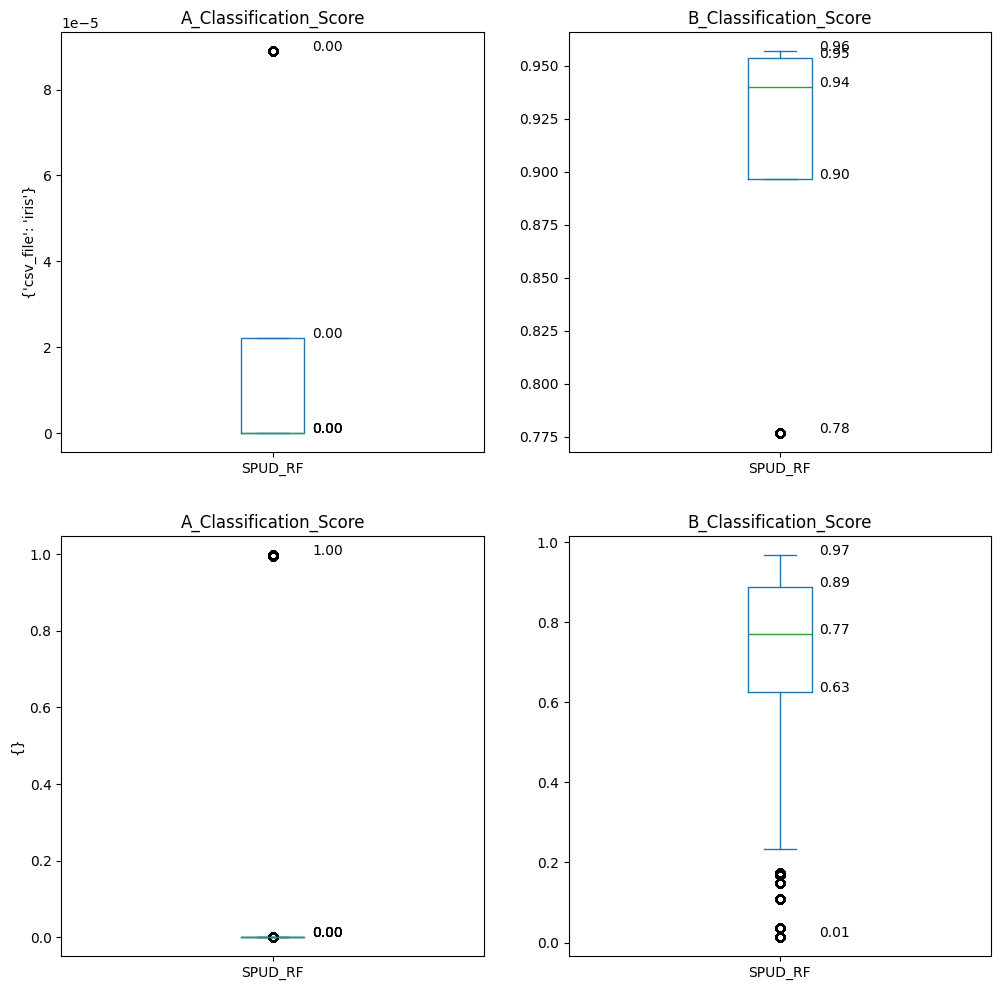

In [4]:
columns = [{"column": 'A_Classification_Score'}, {"column": 'B_Classification_Score'}]
rows = [{"csv_file" : "iris" #, "csv_file" : "iris"
         }, 
        {}]

plot_in_fig(df = subset_df(rf_df, method = "SPUD_RF"), columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

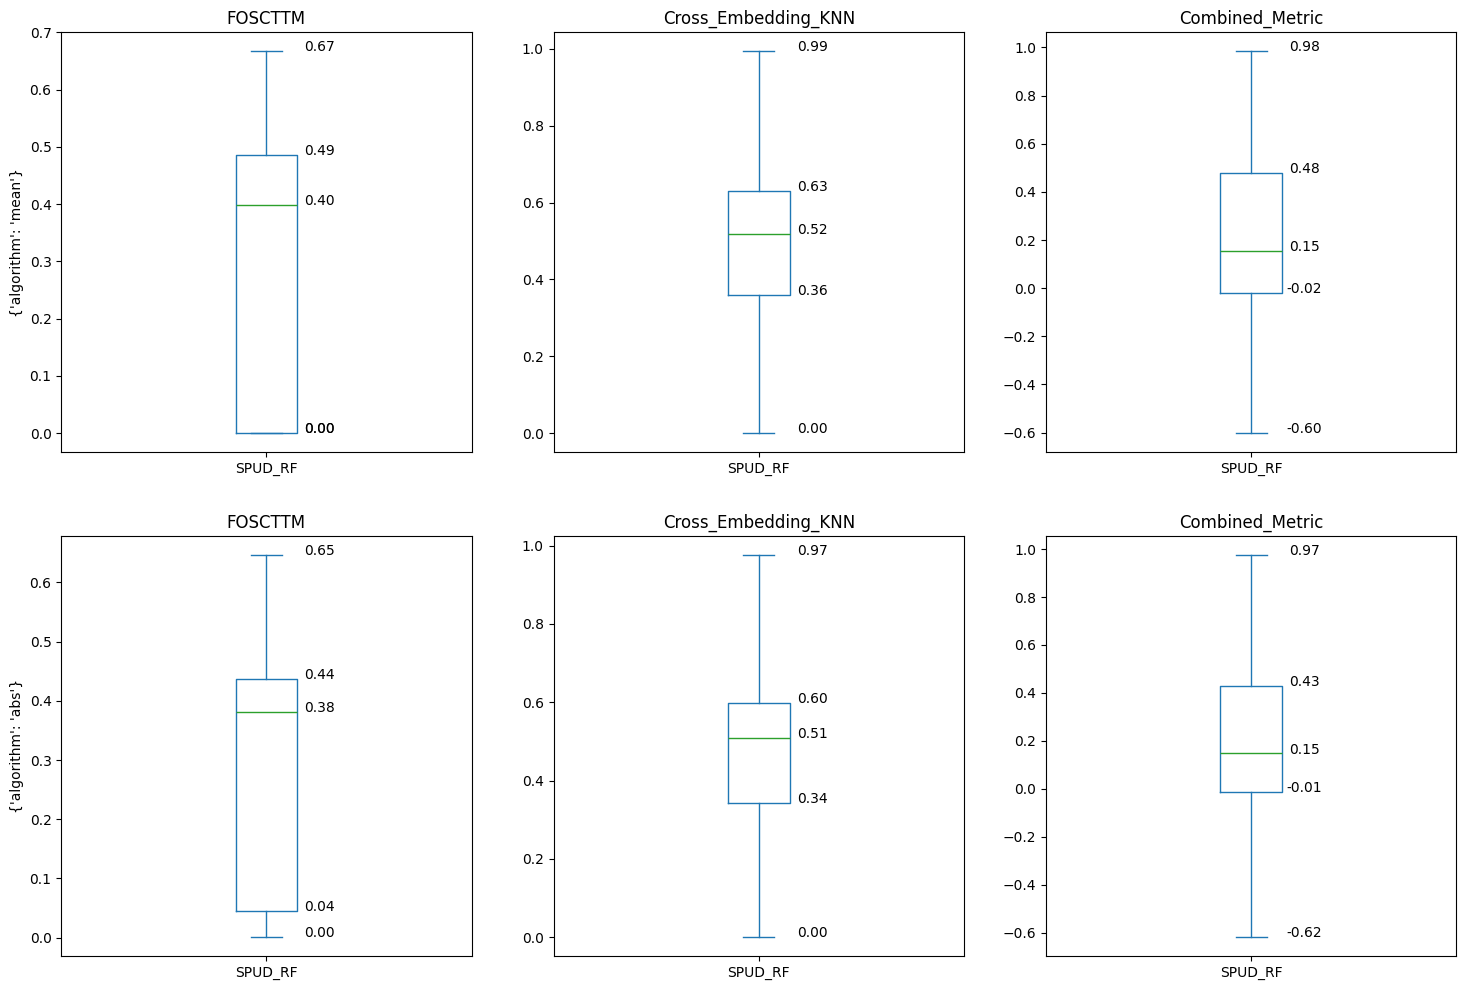

In [7]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"algorithm" : "mean" #, "csv_file" : "iris"
         }, 
        {"algorithm" : "abs" #, "csv_file" : "iris"
         }]

plot_in_fig(df = subset_df(rf_df, method = "SPUD_RF"), columns = columns, rows = rows, plot_labels = True, by='method', kind = 'box')

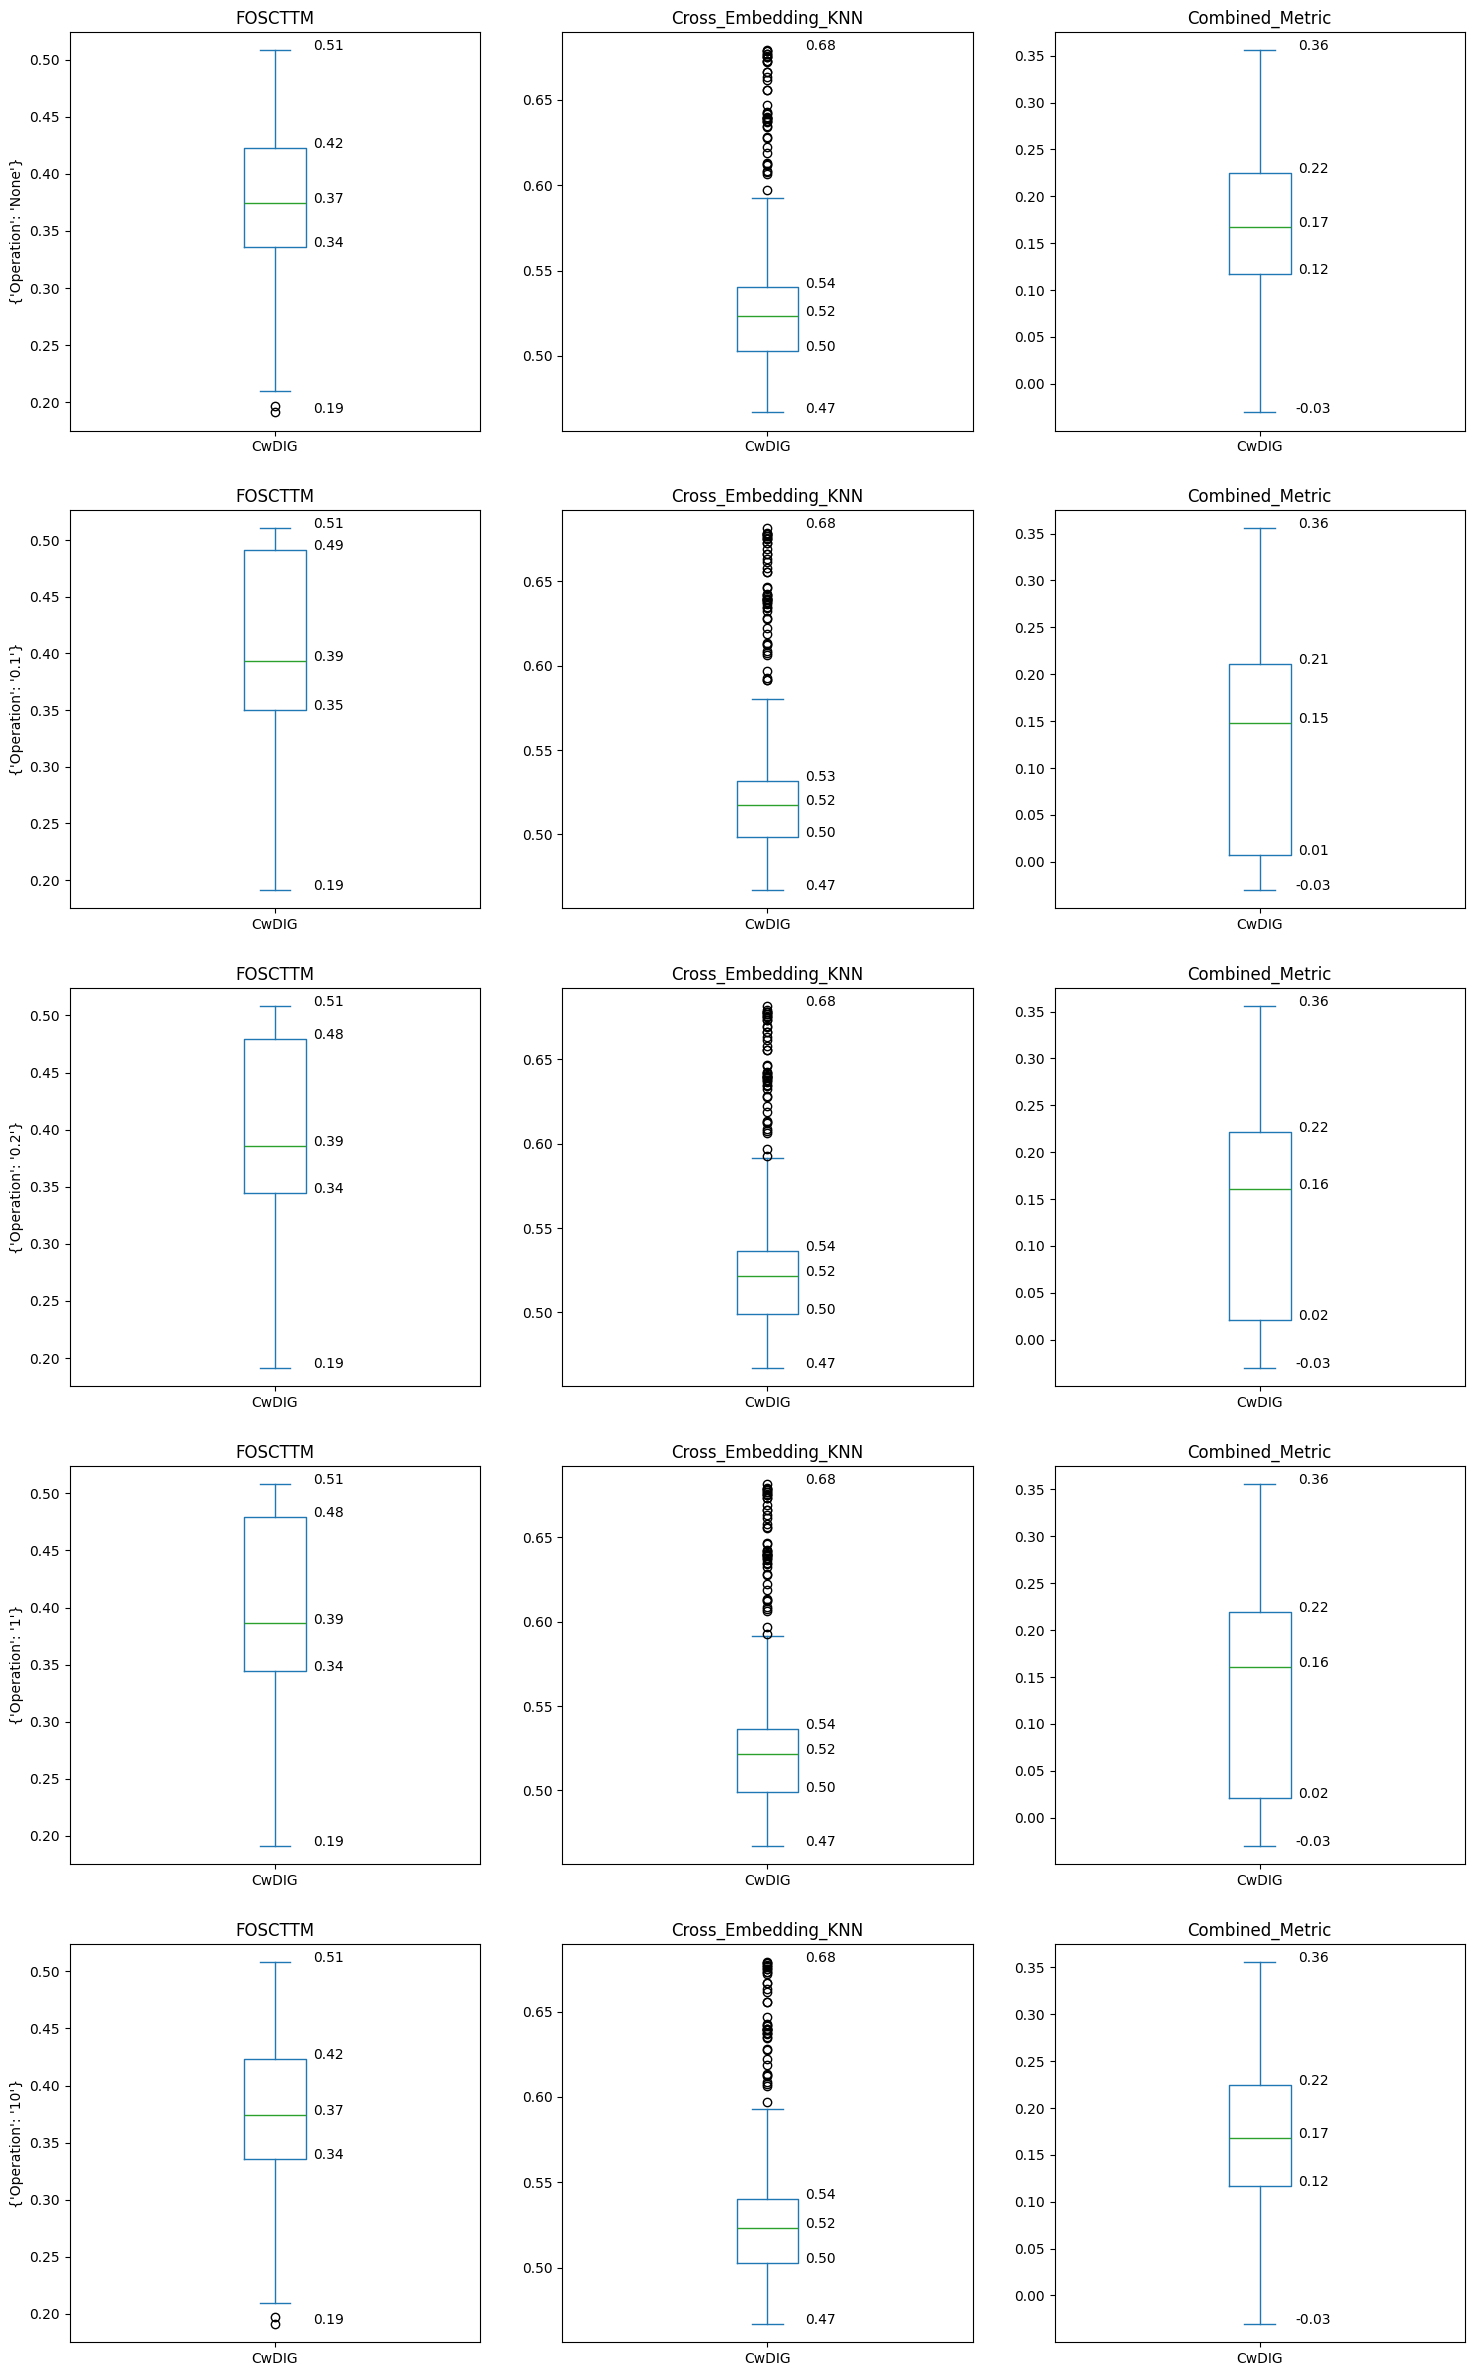

In [8]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"Operation" : "None"}, 
        {"Operation" : "0.1"},
         {"Operation" : "0.2"}, 
        {"Operation" : "1"},
        {"Operation" : "10"}]

plot_in_fig(df = subset_df(df, method = "CwDIG", csv_file = "chess"), columns = columns, plot_labels = True, rows = rows, by='method', kind = 'box')

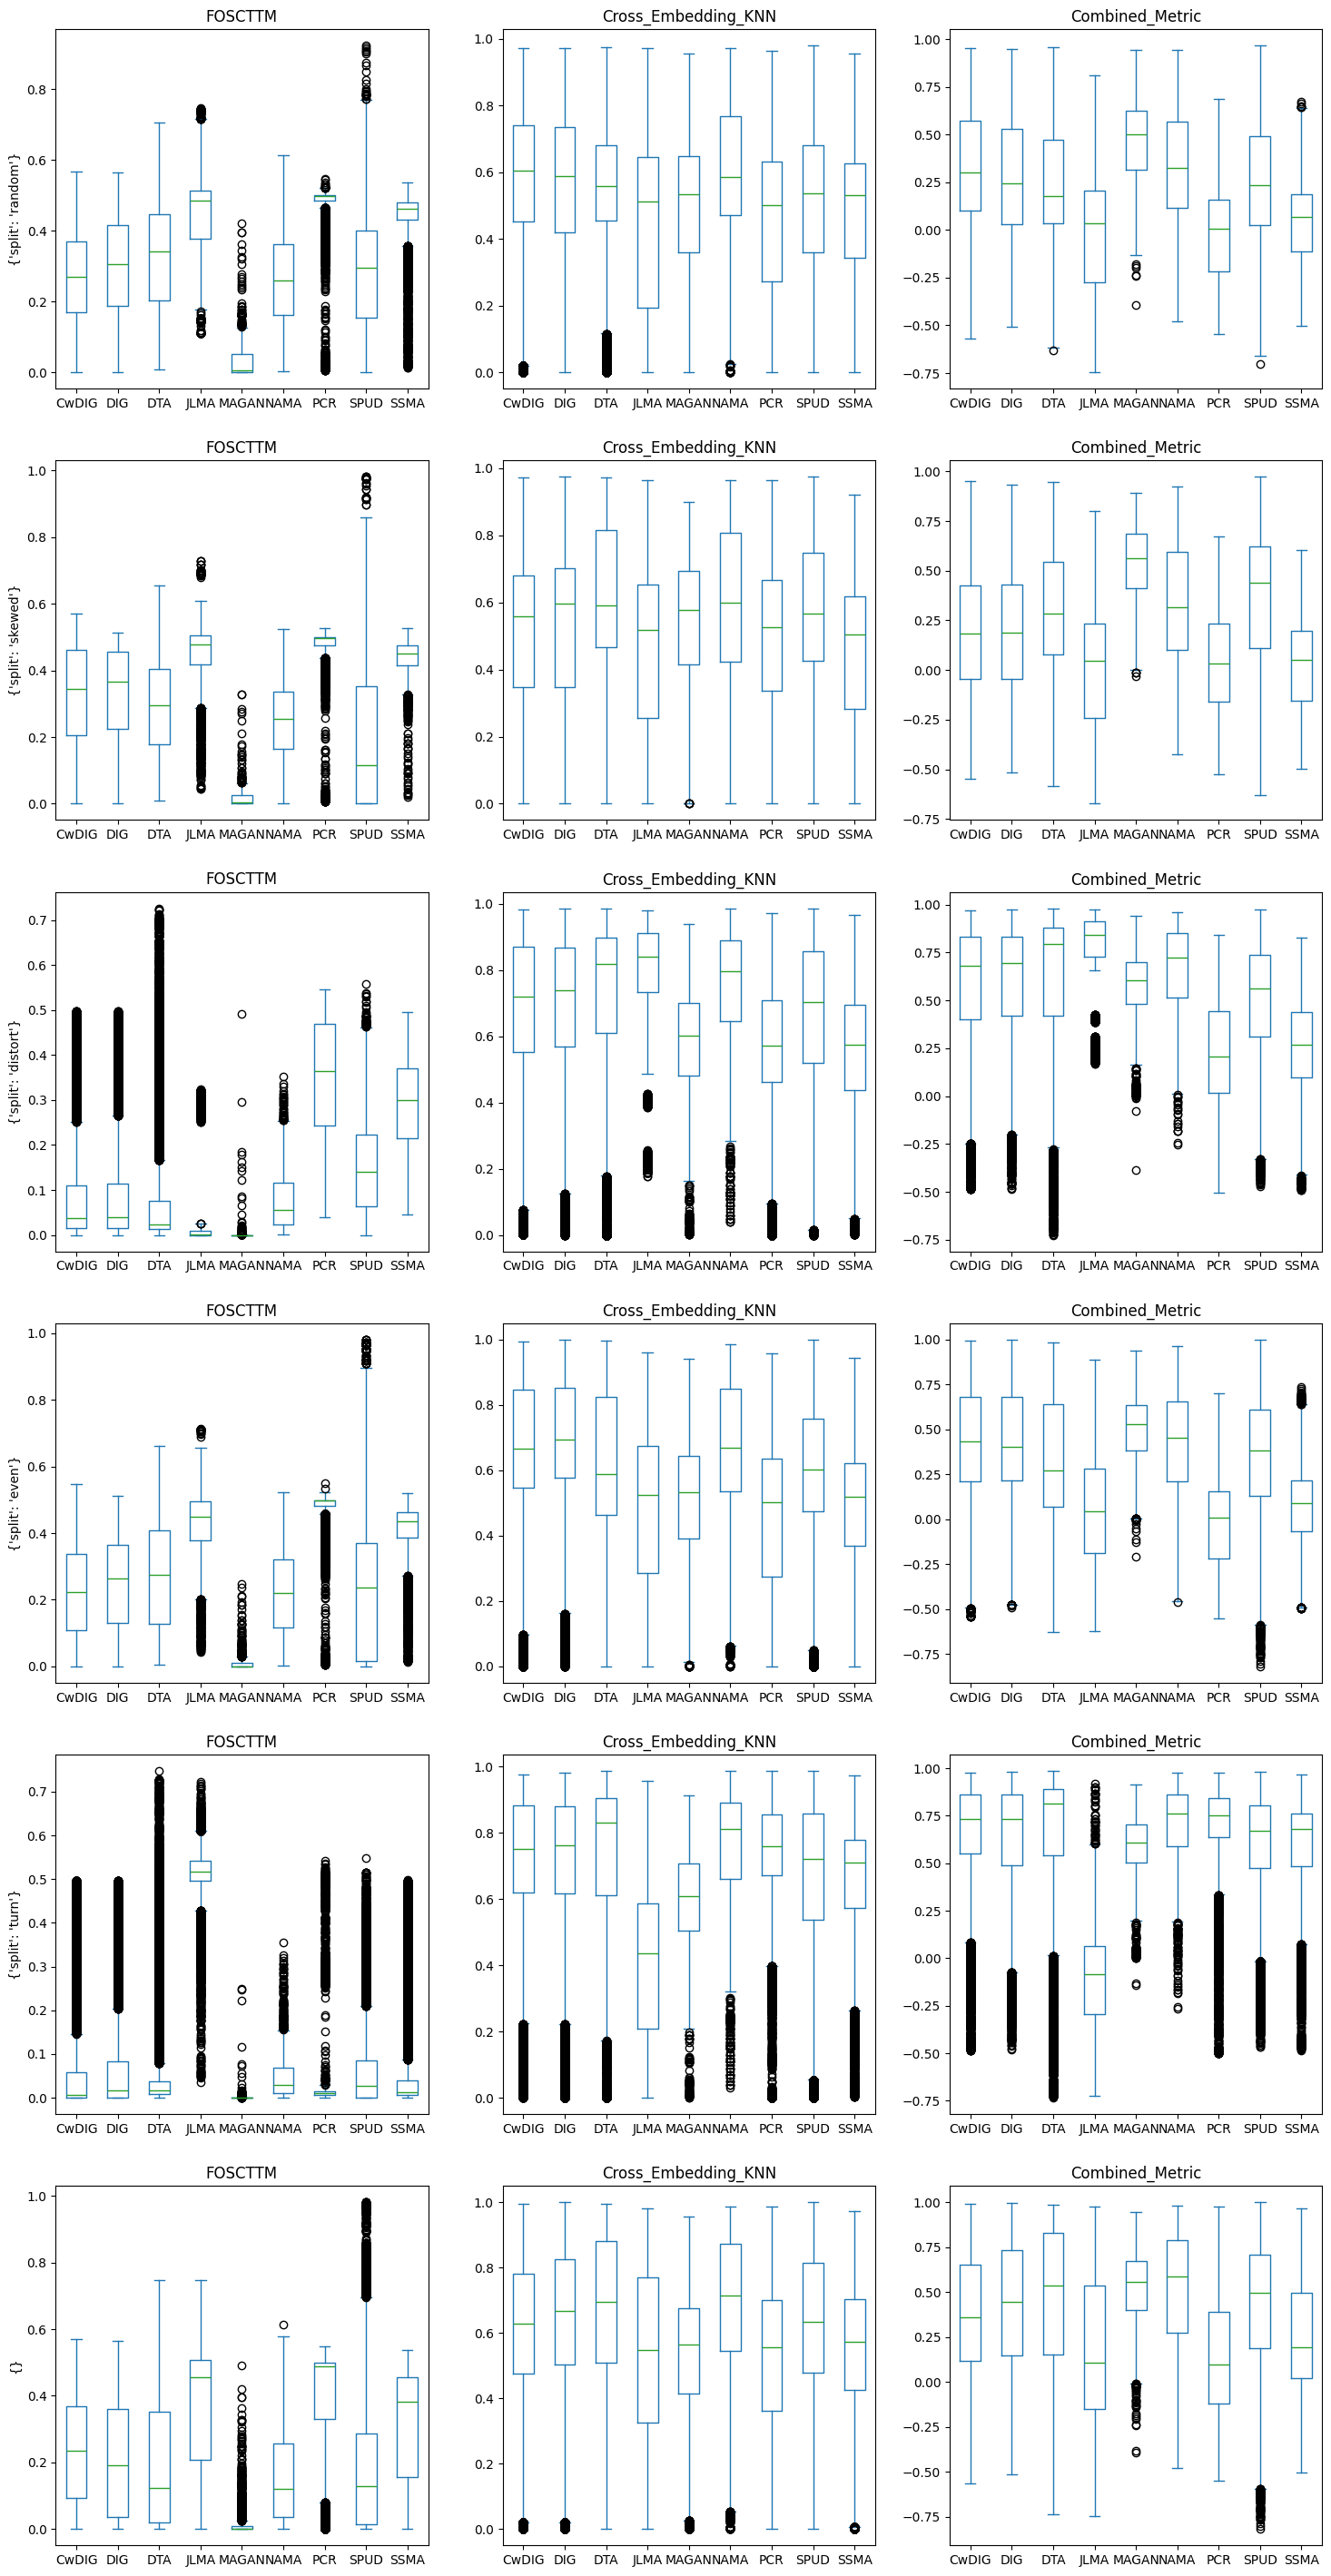

In [9]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         },
         {}]

plot_in_fig(df = df, columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [8]:
def plt_methods_by_CSV_max(df, sort_by = "DIG", metric = "Combined_Metric", return_df =False, plot_methods = ["SSMA", "MAGAN", "DTA", "SPUD_D", "SPUD_M", "DIG", "CwDIG", "NAMA", "PCR", "JLMA", "Split_A", "Split_B"]):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    if metric == "FOSCTTM": #Because for the FOSCTTM the smaller score is better
        agregate_df = pd.DataFrame({
            'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].min(),
            'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].min(),
            'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].min(),
            'SPUD_D': df[df["algorithm"]== "distance"].groupby("csv_file")[metric].min(),
            'SPUD': df[df["algorithm"] == "merge"].groupby("csv_file")[metric].min(),
            'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].min(),
            'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].min(),
            'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].min(),
            'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].min(),
            'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].min(),
            'Split_A': df.groupby("csv_file")["A_Classification_Score"].min(),
            'Split_B': df.groupby("csv_file")["B_Classification_Score"].min(),

            'MASH_RF': df[df["method"] == "MASH_RF"].groupby("csv_file")[metric].min(),
            'MALI_RF': df[df["method"] == "MALI_RF"].groupby("csv_file")[metric].min(),
            'MALI': df[df["method"] == "MALI"].groupby("csv_file")[metric].min(),
            'KEMA_RF': df[df["method"] == "KEMA_RF"].groupby("csv_file")[metric].min(),
            'SPUD_RF': df[df["method"] == "SPUD_RF"].groupby("csv_file")[metric].min()
        })
    else:
        agregate_df = pd.DataFrame({
            'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].max(),
            'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].max(),
            'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].max(),
            'SPUD_D': df[df["algorithm"]== "distance"].groupby("csv_file")[metric].max(),
            'SPUD': df[df["algorithm"] == "merge"].groupby("csv_file")[metric].max(),
            'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].max(),
            'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].max(),
            'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].max(),
            'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].max(),
            'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].max(),
            'Split_A': df.groupby("csv_file")["A_Classification_Score"].max(),
            'Split_B': df.groupby("csv_file")["B_Classification_Score"].max(),

            'MASH_RF': df[df["method"] == "MASH_RF"].groupby("csv_file")[metric].max(),
            'MALI_RF': df[df["method"] == "MALI_RF"].groupby("csv_file")[metric].max(),
            'MALI': df[df["method"] == "MALI"].groupby("csv_file")[metric].max(),
            'KEMA_RF': df[df["method"] == "KEMA_RF"].groupby("csv_file")[metric].max(),
            'SPUD_RF': df[df["method"] == "SPUD_RF"].groupby("csv_file")[metric].max()
        })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index - 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }

    plt.figure(figsize=(16, 6))
    
    if "DIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "MASH", **key_words)
    if "MASH_RF" in plot_methods:
        ax = plt.scatter(y = agregate_df["MASH_RF"], marker = '^', label = "MASH_RF", **key_words)
    if "MALI_RF" in plot_methods:
        ax = plt.scatter(y = agregate_df["MALI_RF"], marker = 'h', label = "MALI_RF", **key_words)
    if "MAGAN" in plot_methods:
        ax = plt.scatter(y = agregate_df["MAGAN"], marker = 'h', label = "MAGAN", **key_words)
    if "JLMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["JLMA"], marker = '_', label = "JLMA", **key_words)
    if "SPUD_D" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD_D"], label = "SPUD_D", **key_words)
    if "KEMA_RF" in plot_methods:
        ax = plt.scatter(y = agregate_df["KEMA_RF"], label = "KEMA", **key_words)
    if "Split_A" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_A"], marker = '.', label = "Split A", **key_words)

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index + 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }
    
    if "CwDIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["CwDIG"], marker = '^', label = "MASH-", **key_words)
    if "MALI" in plot_methods:
        ax = plt.scatter(y = agregate_df["MALI"], marker = 'h', label = "MALI", **key_words)
    if "NAMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    if "PCR" in plot_methods:
        ax = plt.scatter(y = agregate_df["PCR"], marker = 'v', label = "Procrutees", **key_words)
    if "DTA" in plot_methods:
        ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    if "SPUD" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words)
    if "SPUD_RF" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD_RF"], label = "SPUD_RF", **key_words)
    if "SSMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words) 
    if "Split_B" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_B"], marker = '.', label = "Split B", **key_words)


    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MAX)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    #plt.show()

def plt_methods_by_CSV_mean(df, sort_by = "SPUD", metric = "Combined_Metric", return_df = False, plot_methods = ["SSMA", "MASH_RF", "MALI_RF", "SPUD_RF", "MAGAN", "DTA", "SPUD_D", "SPUD_M", "DIG", "CwDIG", "NAMA", "PCR", "JLMA", "Split_A", "Split_B"]):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].mean(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].mean(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].mean(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].mean(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].mean(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].mean(),

        'MASH_RF': df[df["method"] == "MASH_RF"].groupby("csv_file")[metric].mean(),
        'MALI_RF': df[df["method"] == "MALI_RF"].groupby("csv_file")[metric].mean(),
        'MALI': df[df["method"] == "MALI"].groupby("csv_file")[metric].mean(),
        'KEMA_RF': df[df["method"] == "KEMA_RF"].groupby("csv_file")[metric].mean(),
        'SPUD_RF': df[df["method"] == "SPUD_RF"].groupby("csv_file")[metric].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].std(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].std(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].std(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].std(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].std(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].std(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].std(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].std(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].std(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].std(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].std(),

        'MASH_RF': df[df["method"] == "MASH_RF"].groupby("csv_file")[metric].std(),
        'MALI_RF': df[df["method"] == "MALI_RF"].groupby("csv_file")[metric].std(),
        'MALI': df[df["method"] == "MALI"].groupby("csv_file")[metric].std(),
        'KEMA_RF': df[df["method"] == "KEMA_RF"].groupby("csv_file")[metric].std(),
        'SPUD_RF': df[df["method"] == "SPUD_RF"].groupby("csv_file")[metric].std()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    if "DTA" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = ".", label = "DTA", **key_words)
    if "SPUD" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = ".", label = "SPUD", **key_words) 
    if "SPUD_RF" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD_RF"], yerr = err_df["SPUD_RF"], fmt = ".", label = "SPUD_RF", **key_words) 
    if "DIG" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '.', label = "DIG", **key_words)
    if "MASH_RF" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["MASH_RF"], yerr = err_df["MASH_RF"],fmt = '.', label = "MASH_RF", **key_words)
    if "CwDIG" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["CwDIG"], yerr = err_df["CwDIG"],fmt = '.', label = "CwDIG", **key_words)
    if "SSMA" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = '.', label = "SSMA", **key_words)
    if "NAMA" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '.', label = "NAMA", **key_words)
    if "MAGAN" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '.', color = "black", label = "MAGAN", **key_words)
    if "MALI_RF" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MALI_RF"], yerr = err_df["MALI_RF"],fmt = '.', color = "gray", label = "MALI_RF", **key_words)
    if "MALI" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["MALI"], yerr = err_df["MALI"],fmt = '.', color = "black", label = "MALI", **key_words)
    if "KEMA_RF" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["KEMA_RF"], yerr = err_df["KEMA_RF"],fmt = '.', label = "KEMA_RF", **key_words)
    if "JLMA" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index, y = agregate_df["JLMA"], yerr = err_df["JLMA"], fmt = ".", label = "JMLA", **key_words) 
    if "PCR" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index - 0.3, y = agregate_df["PCR"], yerr = err_df["PCR"], fmt = ".", label = "Procrustees", **key_words) 

    if "Split_A" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index + 0.4, y = agregate_df["Split_A"], yerr = err_df["Split_A"], fmt = "_", label = "Split_A", **key_words) 
    if "Split_B" in plot_methods:
        ax = plt.errorbar(x = agregate_df.index - 0.4, y = agregate_df["Split_B"], yerr = err_df["Split_B"], fmt = "_", label = "Split_B", **key_words) 


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MEAN)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

In [11]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 't_value', 'Predicted_Feature_MAE',
       'Operation', 'algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

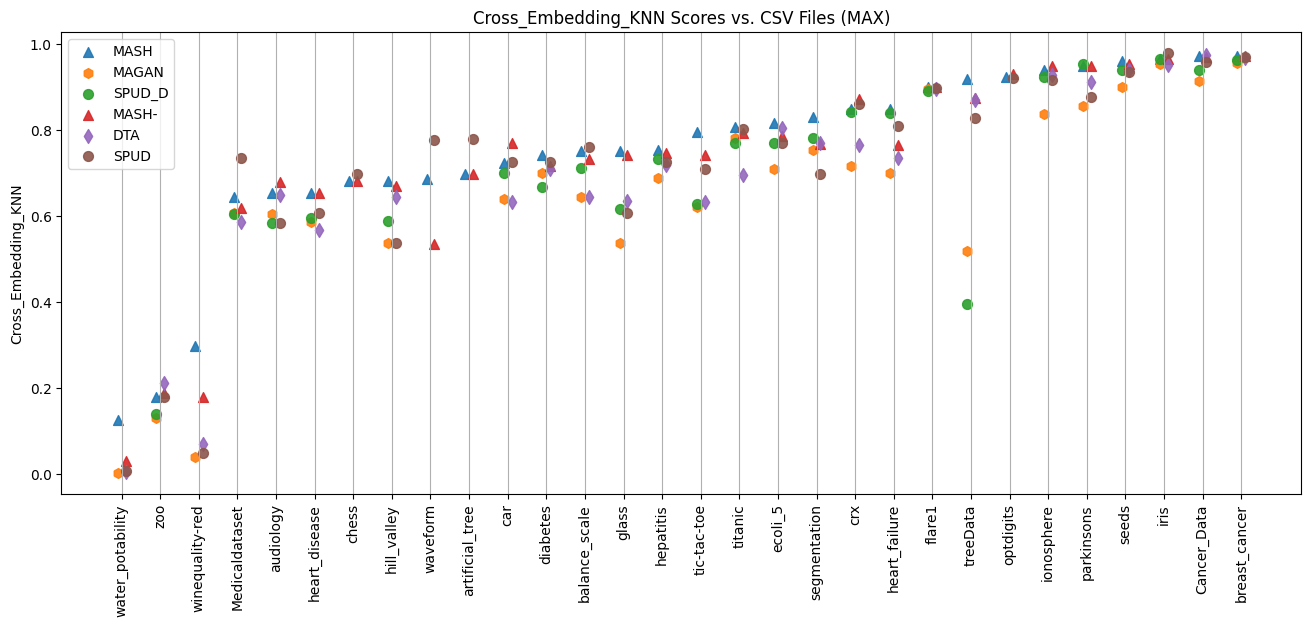

In [6]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), metric = "Cross_Embedding_KNN", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG"])

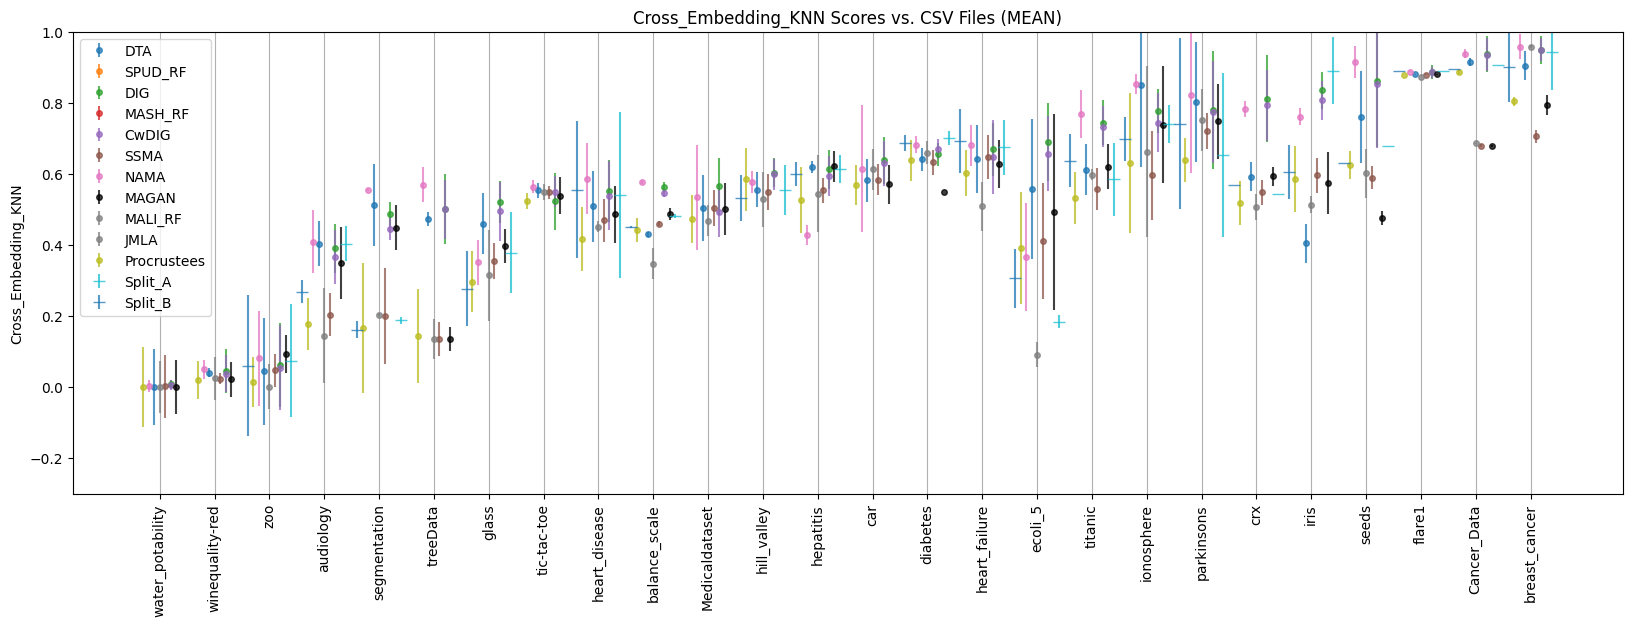

In [13]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "skewed"), metric = "Cross_Embedding_KNN", sort_by="DIG")

RF Plots

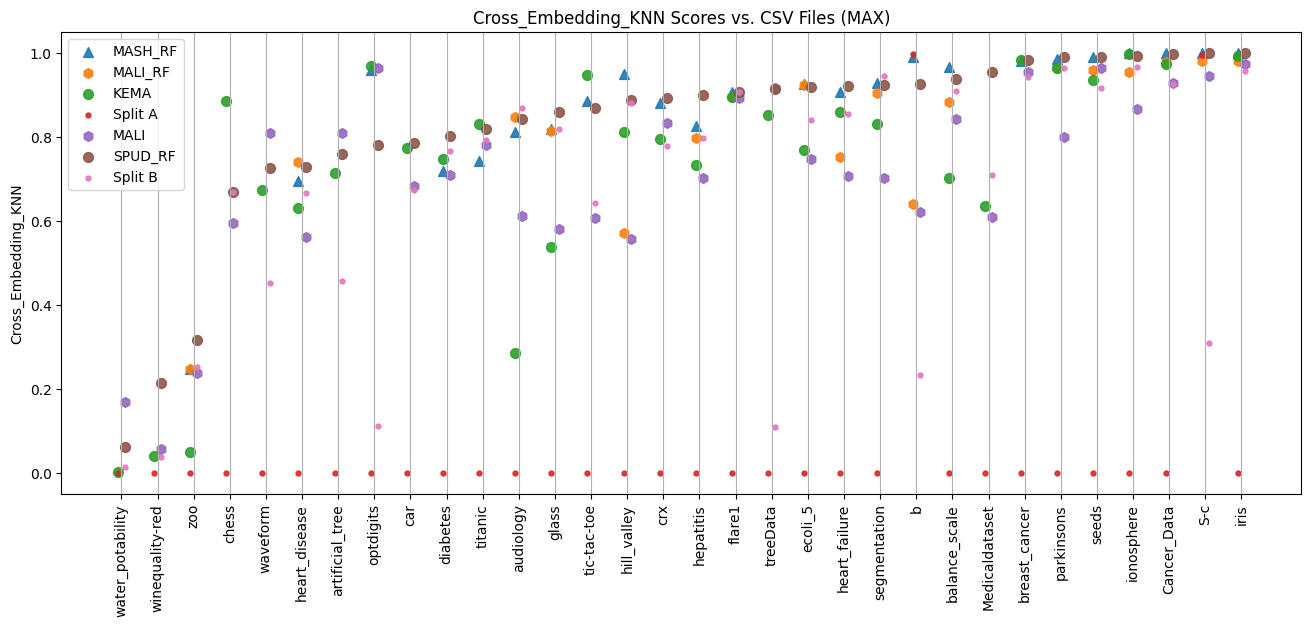

In [5]:
#RF Plot
plt_methods_by_CSV_max(df = rf_df, sort_by= "SPUD_RF", metric = "Cross_Embedding_KNN",  plot_methods = ["MALI_RF", "MASH_RF", "SPUD_RF", "KEMA_RF", "MALI", "Split_A", "Split_B"])

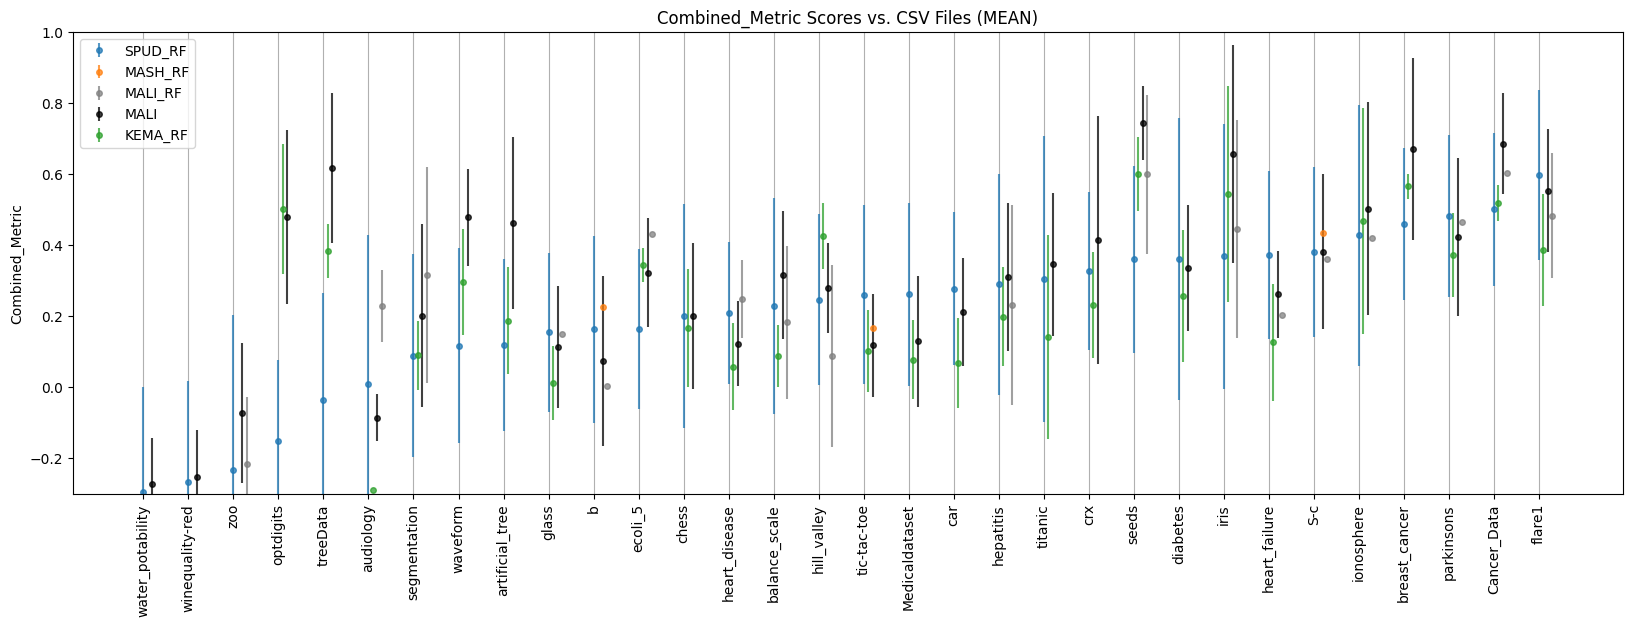

In [15]:
plt_methods_by_CSV_mean(df = rf_df, metric = "Combined_Metric", sort_by="SPUD_RF", plot_methods = ["MALI_RF", "MASH_RF", "SPUD_RF", "KEMA_RF", "MALI"])

### Simple Ranking

In [16]:
def get_mean_std_df(split = "all", scoring = "Combined_Metric", columns_to_drop = ["MASH_RF", "MALI_RF", "KEMA_RF", "SPUD_RF", "MALI"], **kwargs):

    #Add DF 
    if "df" not in kwargs.keys():
        kwargs["df"] = df

    #Add the values of all the dfs together
    if split == "all":
        #Create the base set
        split_df = plt_methods_by_CSV_max(df = subset_df(split = "turn", **kwargs), metric = scoring, return_df=True)

        for s_type in ["distort", "even", "skewed", "random"]:
            #Add each of the sets to the dataframe
            split_df = split_df._append(plt_methods_by_CSV_max(df = subset_df(split = s_type, **kwargs), metric = scoring, return_df=True))

    else:
        #Create the df 
        split_df = plt_methods_by_CSV_max(df = subset_df(split = split, **kwargs), metric = scoring, return_df=True)

    #Drop unneeded columns
    csv_df = split_df.drop(columns= ["SPUD_D", "csv_file", "Split_A", "Split_B"] + columns_to_drop).dropna()
    
    #Get column size 
    n_cols = len(csv_df.columns)

    #Create csv df
    csv_df_std = pd.DataFrame(np.reshape(np.std(csv_df.to_numpy(), axis = 0), newshape = (1,n_cols)), columns = csv_df.columns)
    csv_df = csv_df_std._append((pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,n_cols)), columns = csv_df.columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,n_cols)), columns = csv_df.columns).rank(ascending=False, method='max', axis = 1))).reset_index().sort_values(by = 0, ascending = False, axis=1).drop(columns = ["index"]))


    #Rename the index
    csv_df.index = ["STD", "Mean", "rankings"]

    return csv_df

def plot_ranks(scoring = "Combined_Metric", **kwargs):

    #Create a dataframe to add too:
    agregate_df = get_mean_std_df(scoring = scoring, **kwargs).head(2)

    #Add all the other dfs
    for kind in ["random", "skewed", "even", "distort", "turn"]:
        agregate_df = agregate_df._append(get_mean_std_df(scoring = scoring, split = kind, **kwargs).head(2))
    
    #Reset index
    agregate_df.index = ["STD - all", "MEAN - all", "STD - random", "MEAN - random","STD - skewed", "MEAN - skewed","STD - even", "MEAN - even","STD - distort", "MEAN - distort","STD - turn", "MEAN - turn"]

    # Sort columns based on the 'MEAN - all' row
    sorted_columns = agregate_df.loc['MEAN - all'].sort_values(ascending = False).index
    agregate_df = agregate_df[sorted_columns]
    columns = agregate_df.columns
    x = np.array(range(len(columns))) / 15
    
    # Plotting
    plt.figure(figsize=(14, 8))

    legend = True

    
    # Define the colorblind-friendly colors
    colors = ['#000000', '#e41a1c', '#377eb8', 
              '#4daf4a', '#984ea3', '#ff7f00', 
              '#a65628', '#f781bf', '#999999']
    
    for i in range(0, len(agregate_df), 2):
        std_values = agregate_df.iloc[i].values
        mean_values = agregate_df.iloc[i+1].values

        for pos, mean, std, label, c in zip(x, mean_values, std_values, columns, colors):
            
            #change the format
            if pos < x[int(len(x)/2)]:
                fmt = 'o'
            else:
                fmt = "^"

            #Rename DIG to MAD
            if label == "DIG":
                label = "MASH-"
            elif label == 'CwDIG':
                label = "MASH"
            elif label == 'PCR':
                label = "MAPA"

            plt.errorbar(pos - 0.3, mean, yerr=std, fmt=fmt, label=label, elinewidth= 2, color = c, ms = 10, capsize=5)

        if legend:
            plt.legend(fontsize = 16, loc = (0.635, 0.01))
            legend = False

        #Move the positions over
        x += 1
    
    
    plt.xticks(np.array(range(0,6)) - 0.04, ["all", "random", "skewed", "even", "distort", "rotation"], fontsize = 20, rotation=0)
    plt.yticks(fontsize=16)
    #plt.xlabel('Domain Adaptation Methods', fontsize=15)
    plt.ylabel('Combined Metric', fontsize=20)
    plt.title('Comparison of Results', fontsize=25)
    plt.grid(visible=True, axis = "y")
    plt.tight_layout()
    plt.show()
    

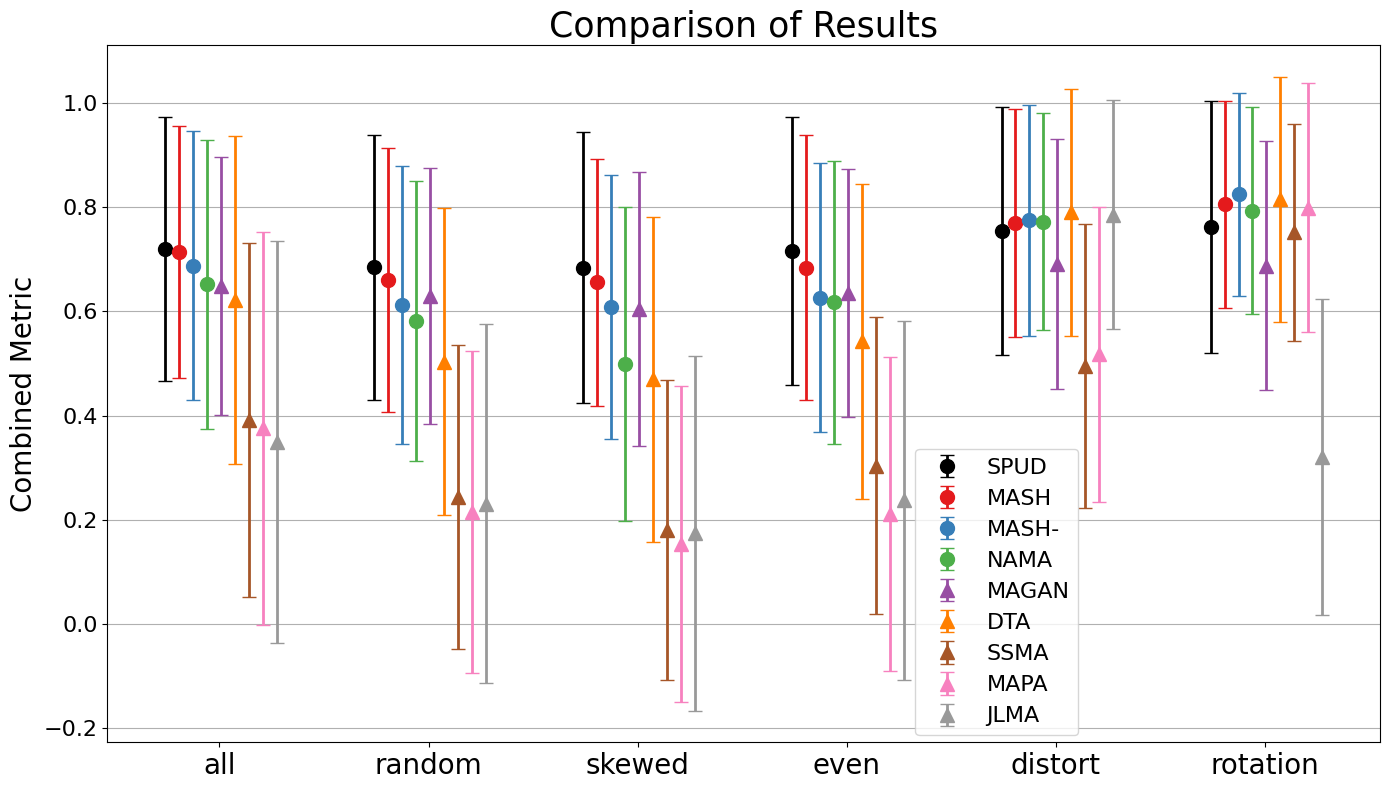

In [17]:
plot_ranks()

In [18]:
get_mean_std_df(split = "random", columns_to_drop = ['SSMA', 'MAGAN', 'DTA', 'SPUD_D', 'KEMA_RF', 'SPUD', 'DIG', 'CwDIG', 'NAMA', 'PCR', 'JLMA'])

MASH_RF  MALI_RF  MALI  SPUD_RF
STD           NaN      NaN   NaN      NaN
Mean          NaN      NaN   NaN      NaN
rankings      NaN      NaN   NaN      NaN

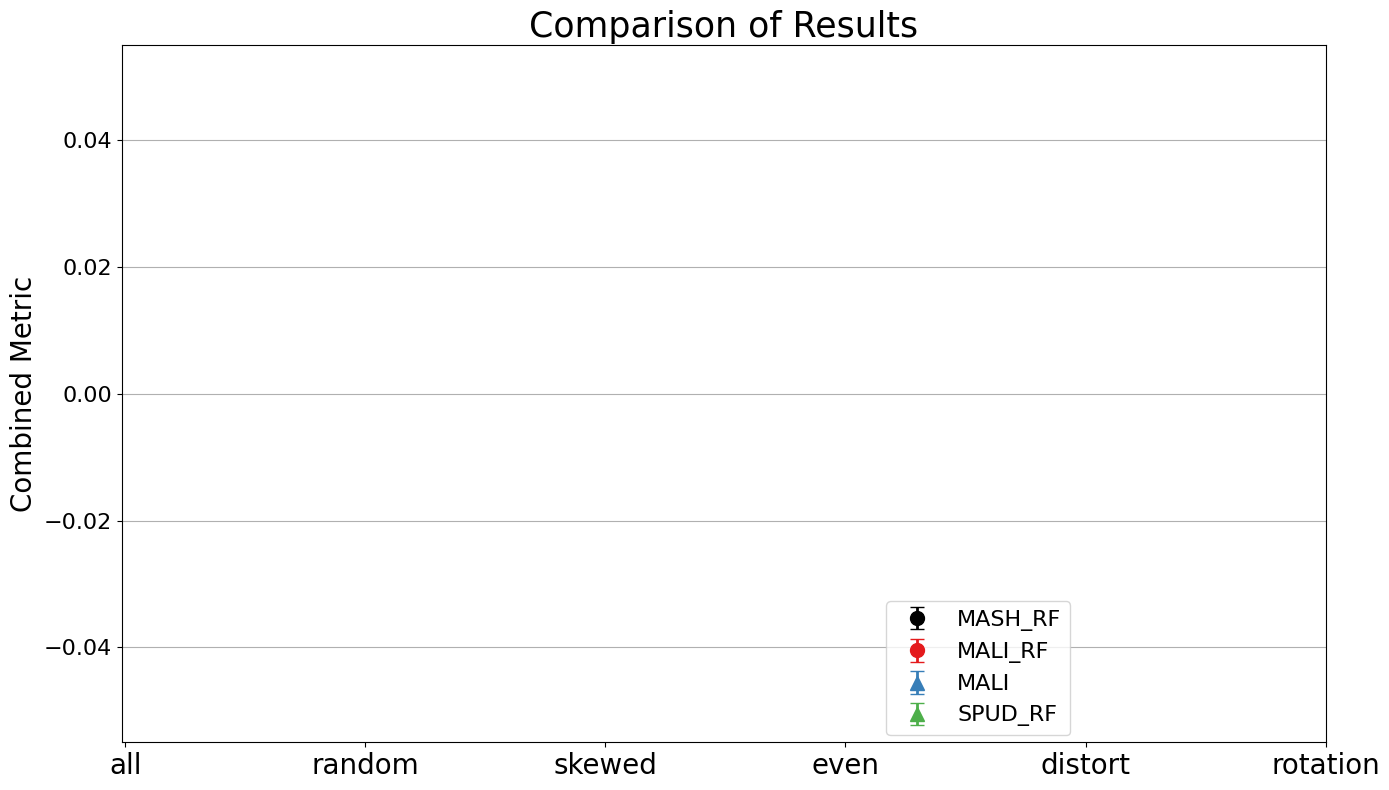

In [19]:
plot_ranks(columns_to_drop = ['SSMA', 'MAGAN', 'DTA', 'SPUD_D', 'KEMA_RF', 'SPUD', 'DIG', 'CwDIG', 'NAMA', 'PCR', 'JLMA'])

## Comparing Parameters across all methods

### Line Plots

In [20]:
def line_plot_methods(df_subset = df, argument = "Percent_of_Anchors", metric = "Combined_Metric", plt_legend = False, custom_title = False):
    "subset should equal none or the csv file name"

    #Create figure
    plt.figure(figsize=(14,7))

    # Group by 'csv_file' and 'argument' to get the max 'metric' for each file and argument
    SSMA = df_subset[df_subset["method"] == "SSMA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    DIG = df_subset[df_subset["method"] == "DIG"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    CwDIG = df_subset[df_subset["method"] == "CwDIG"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    JLMA = df_subset[df_subset["method"] == "JLMA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    MAGAN = df_subset[df_subset["method"] == "MAGAN"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    MAPA = df_subset[df_subset["method"] == "PCR"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    SPUD = df_subset[df_subset["method"] == "SPUD"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
    DTA = df_subset[df_subset["method"] == "DTA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]


    #Keywords arguments
    line_styles = {"linewidth" : 3,
                   "linestyle" : '-'
                   }
    
    scatter_styles = {"s" : 100}



    #Plot the graphs
    plt.plot(SPUD.mean(), label = "SPUD", color = '#000000', **line_styles)
    plt.plot(CwDIG.mean(), label = "MASH", color ='#e41a1c', **line_styles)
    plt.plot(DIG.mean(), label = "MASH-", color =  '#377eb8', **line_styles)    
    plt.plot(DTA.mean(), label = "DTA", color = "#4daf4a", **line_styles)
    plt.plot(MAGAN.mean(), label = "MAGAN", color = "#984ea3", **line_styles)

    if argument != "Percent_of_KNN":
        NAMA = df_subset[df_subset["method"] == "NAMA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
        plt.plot(NAMA.mean(), label = "NAMA", color = "#ff7f00", **line_styles)
        
    plt.plot(SSMA.mean(), label = "SSMA", color = "#a65628", **line_styles) #I want the max, and then the mean of the csvs    
    plt.plot(MAPA.mean(), label = "MAPA", color = "#f781bf", **line_styles )
    plt.plot(JLMA.mean(), label = "JLMA", color = "#999999", **line_styles)


    """#Scatter plot
    plt.errorbar(x = [0,1,2,3,4,5], y = SPUD.mean(), label = "SPUD", color = '#000000', yerr = SPUD.std()/2, **scatter_styles)
    plt.errorbar(x = np.array([0,1,2,3,4,5]) + 0.1/2, y =CwDIG.mean(), yerr = CwDIG.std()/2, label = "MASH", color ='#e41a1c', **scatter_styles)
    plt.errorbar(x = np.array([0,1,2,3,4,5]) - 0.1/2, y = DIG.mean(), yerr = DIG.std()/2, label = "MASH-", color =  '#377eb8', **scatter_styles)    
    plt.errorbar(x = np.array([0,1,2,3,4,5]) + 0.2/2, y = DTA.mean(),yerr = DTA.std()/2,  label = "DTA", color = "#4daf4a", **scatter_styles)
    plt.errorbar(x = np.array([0,1,2,3,4,5]) + 0.3/2, y = MAGAN.mean(),yerr = MAGAN.std()/2, label = "MAGAN", color = "#984ea3", **scatter_styles)

    if argument != "Percent_of_KNN":
        NAMA = df_subset[df_subset["method"] == "NAMA"].groupby(['csv_file', argument])[metric].max().reset_index().groupby(argument)[metric]
        plt.errorbar(x = np.array([0,1,2,3,4,5]) -0.2/2, y = NAMA.mean(), yerr = NAMA.std()/2, label = "NAMA", color = "#ff7f00", **scatter_styles)
        
    plt.errorbar(x = np.array([0,1,2,3,4,5]) - 0.3/2, y = SSMA.mean(), yerr = SSMA.std()/2, label = "SSMA", color = "#a65628", **scatter_styles) #I want the max, and then the mean of the csvs    
    plt.errorbar(x = np.array([0,1,2,3,4,5]) + 0.4/2 , y = MAPA.mean(), yerr = MAPA.std()/2, label = "MAPA", color = "#f781bf", **scatter_styles )
    plt.errorbar(x = np.array([0,1,2,3,4,5]) - 0.4/2, y = JLMA.mean(), yerr = JLMA.std()/2, label = "JLMA", color = "#999999", **scatter_styles)

    """

    import seaborn as sns
    sns.scatterplot(CwDIG.mean(), color ='#e41a1c', **scatter_styles)
    sns.scatterplot(DIG.mean(), color =  '#377eb8', **scatter_styles)    
    sns.scatterplot(DTA.mean(),  color = "#4daf4a", **scatter_styles)
    sns.scatterplot(MAGAN.mean(), color = "#984ea3", **scatter_styles)

    if argument != "Percent_of_KNN":
        NAMA = df_subset[df_subset["method"] == "NAMA"].groupby(['csv_file', argument])[metric].max().reset_index()
        sns.scatterplot(NAMA.groupby(argument)[metric].mean(),  color = "#ff7f00", **scatter_styles)
        
    sns.scatterplot(SSMA.mean(), color = "#a65628", **scatter_styles) #I want the max, and then the mean of the csvs    
    sns.scatterplot(MAPA.mean(), color = "#f781bf", **scatter_styles )
    sns.scatterplot(JLMA.mean(), color = "#999999", **scatter_styles)



    #Make it pretty
    plt.xlabel(argument.replace('_', " "), fontsize = 20)
    plt.ylabel(metric.replace('_', " "), fontsize = 20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    if plt_legend != False:
        plt.legend(fontsize=16, loc = plt_legend, ncol = 3)

    if custom_title != False:
        plt.title(custom_title, fontsize = 25)

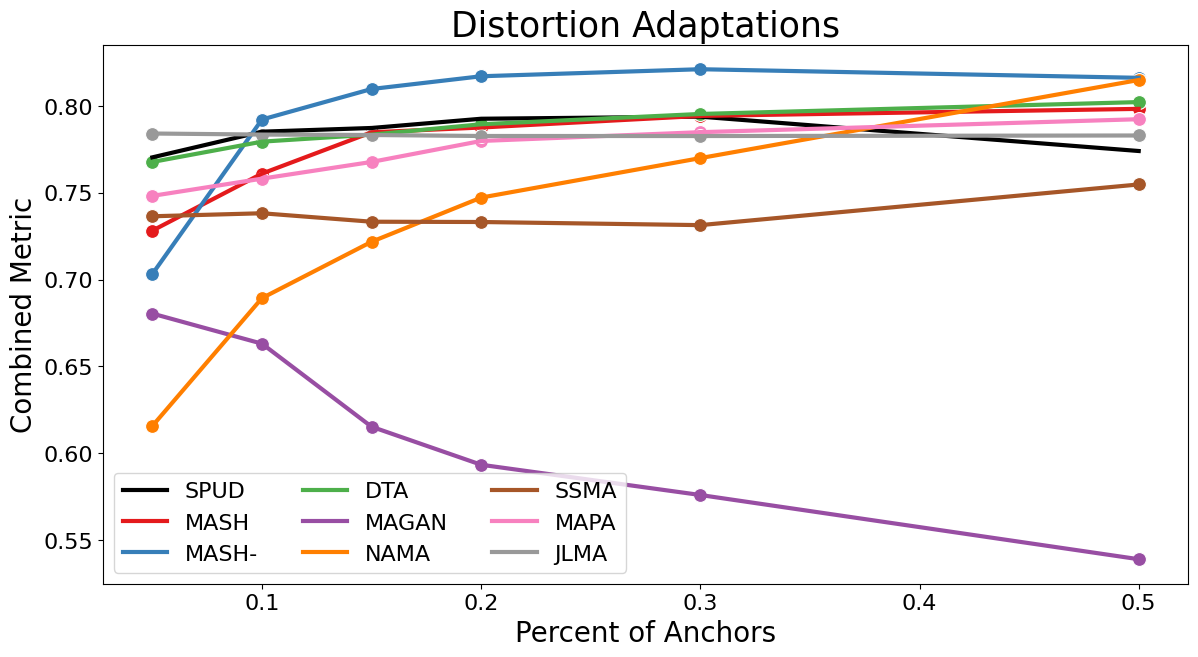

In [21]:
distort_turn = df[df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = distort_turn, metric = "Combined_Metric", custom_title="Distortion Adaptations", plt_legend = (0.01, 0.02))

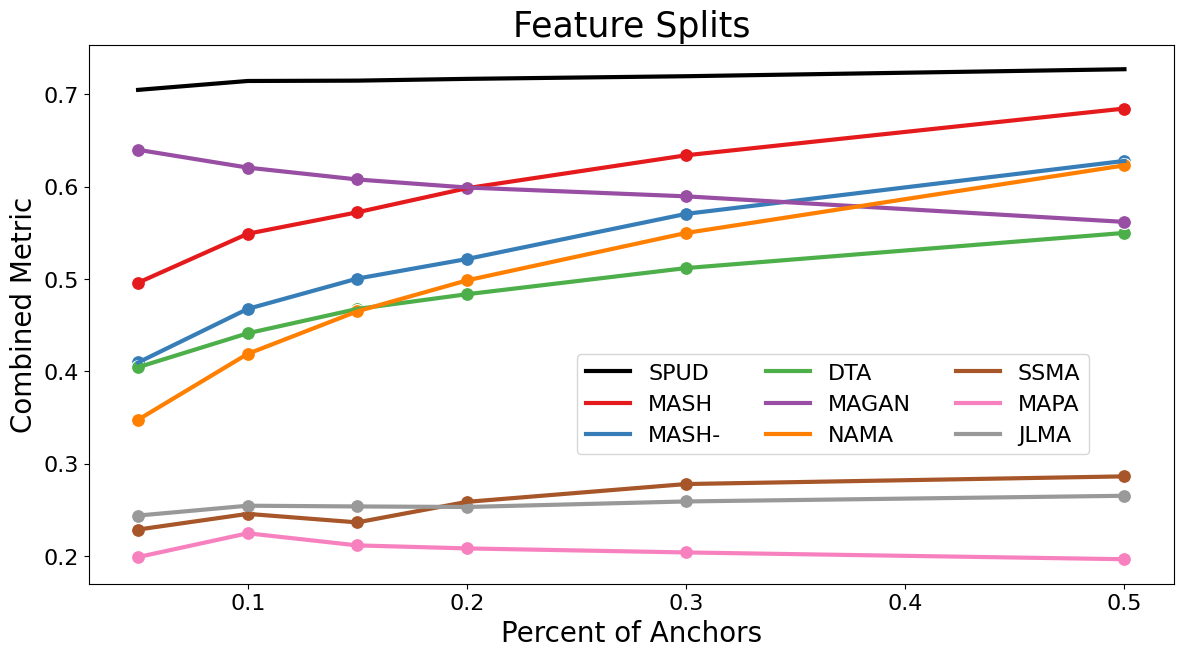

In [22]:
feature_splits = df[~df["split"].isin(["distort", "turn"])]
line_plot_methods(df_subset = feature_splits, metric = "Combined_Metric", plt_legend = (0.45, 0.24), custom_title="Feature Splits")

### Contrasting RF to default

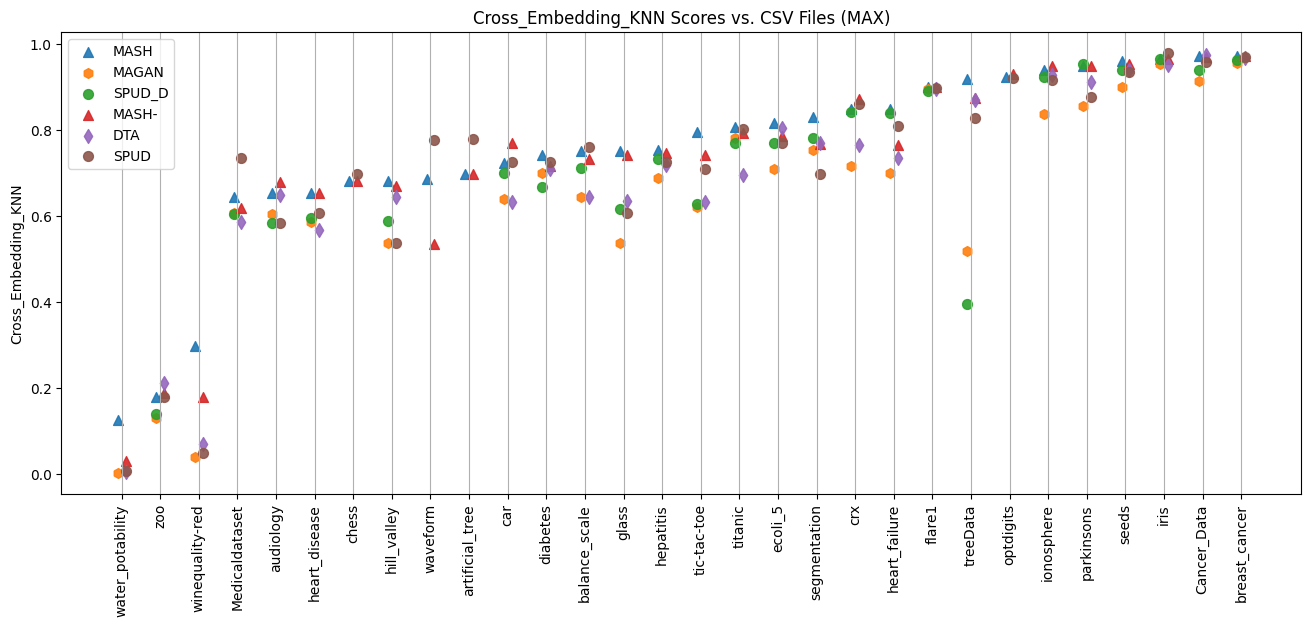

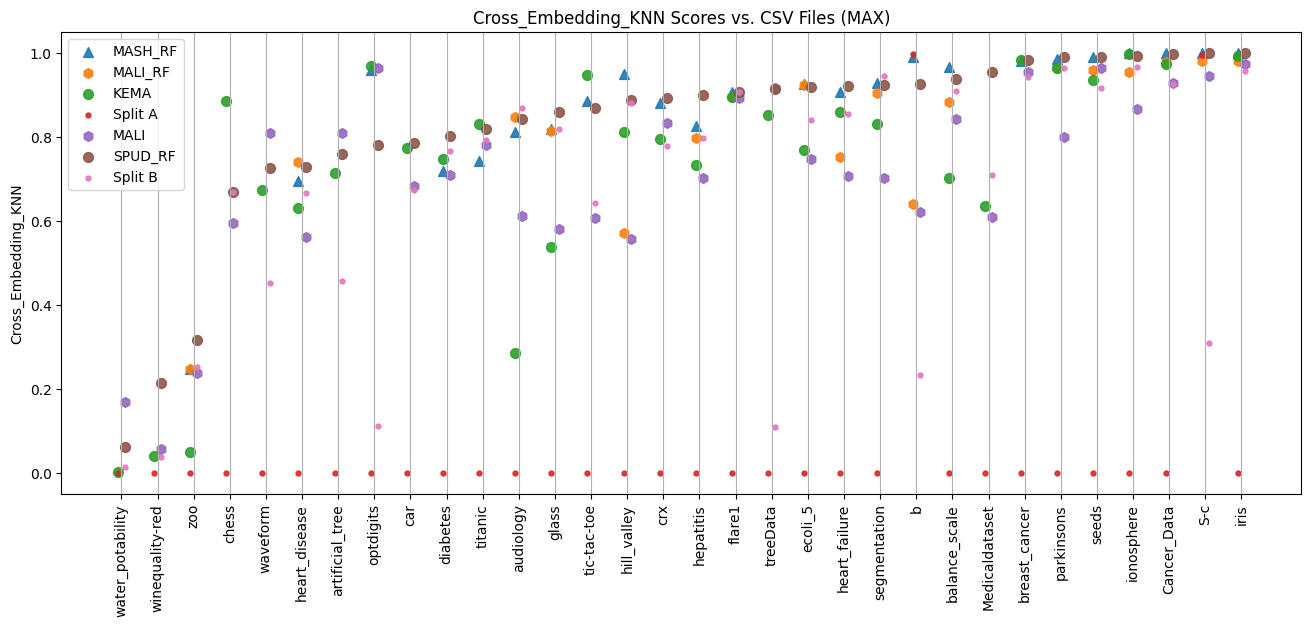

In [12]:
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), metric = "Cross_Embedding_KNN", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD", "CwDIG"])
plt_methods_by_CSV_max(df = rf_df, sort_by= "SPUD_RF", metric = "Cross_Embedding_KNN",  plot_methods = ["MALI_RF", "MASH_RF", "SPUD_RF", "KEMA_RF", "MALI", "Split_A", "Split_B"])
plt.show()

### Sparse Data comparison

#### Set Up

In [23]:
from SPUD_Copy import SPUD_Copy
from DIG import DIG

In [24]:
sparse_dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=42)
sparse_dc.split_A = sparse_dc.split_A
sparse_dc.split_B = sparse_dc.split_B
#Randomly select points
import random
random_points = random.sample(range(len(sparse_dc.split_A)), k = int(len(sparse_dc.split_A)/10))

#Create the macthing anchors
sparse_dc.anchors = np.array([range(int(len(sparse_dc.split_A)/10)), random_points]).T

#Subset split A to only have some of the points
sparse_dc.split_A = sparse_dc.split_A[random_points]

#Create labels
sparse_labels = np.hstack([sparse_dc.labels[random_points], sparse_dc.labels])


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


#### Sparse DIG

In [25]:
sparse_DIG = DIG(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, DTM = "log", knn = 4)

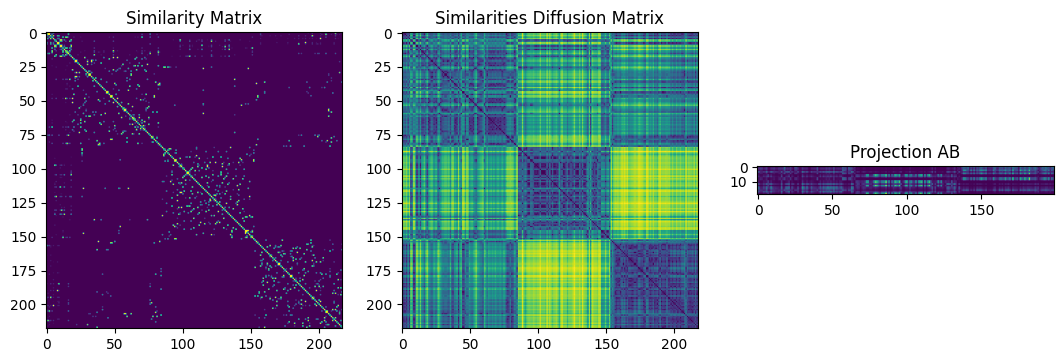

In [26]:
sparse_DIG.plot_graphs()

Model Stress: 91.00021307559534
Cross Embedding: 0.8391959798994975
Can't compute FOSCTTM with different domain shapes.


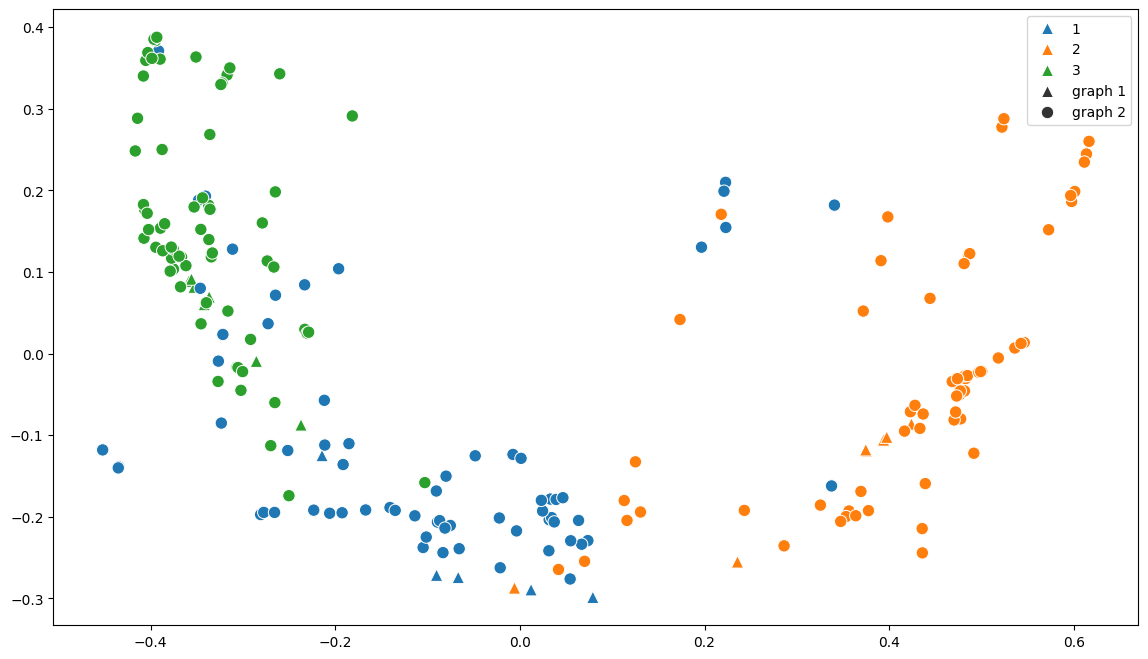

In [27]:
sparse_DIG.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

#### Sparse SPUD

In [28]:
sparse_spud = SPUD_Copy(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors, operation = "sqrt", knn = 4)
#sparse_spud.plot_graphs()

Model Stress: 119.01061572536022
Cross Embedding: 0.8118222692409416
Can't compute FOSCTTM with different domain shapes.


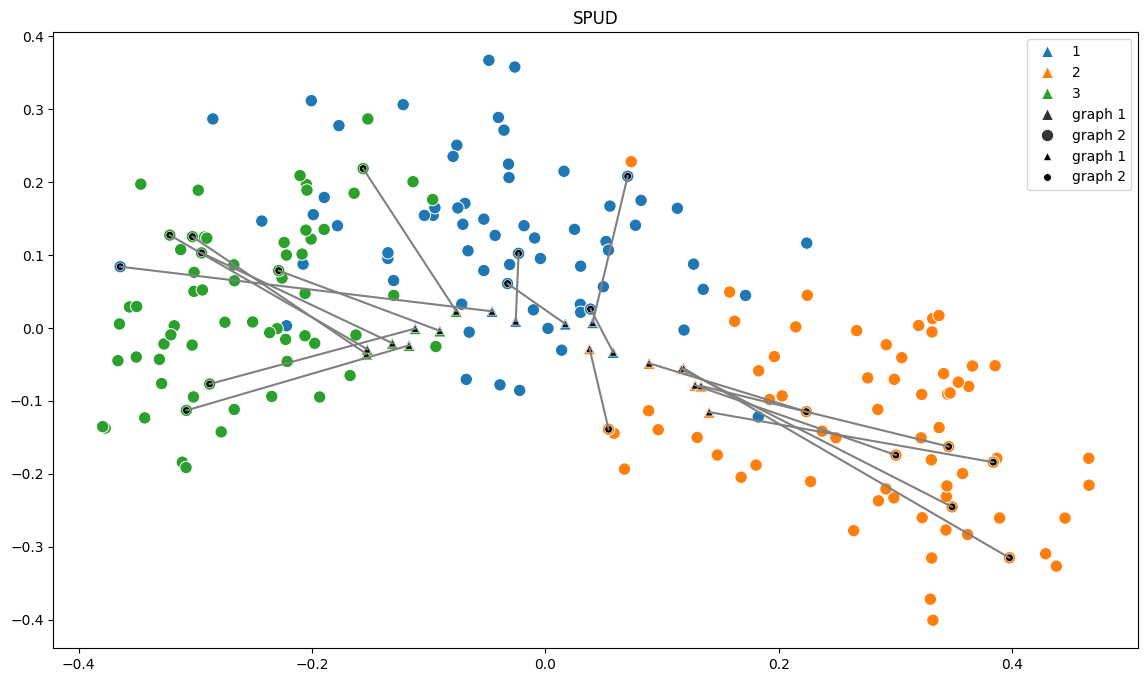

In [29]:

sparse_spud.plot_emb(sparse_labels, show_lines = False, show_anchors = True)

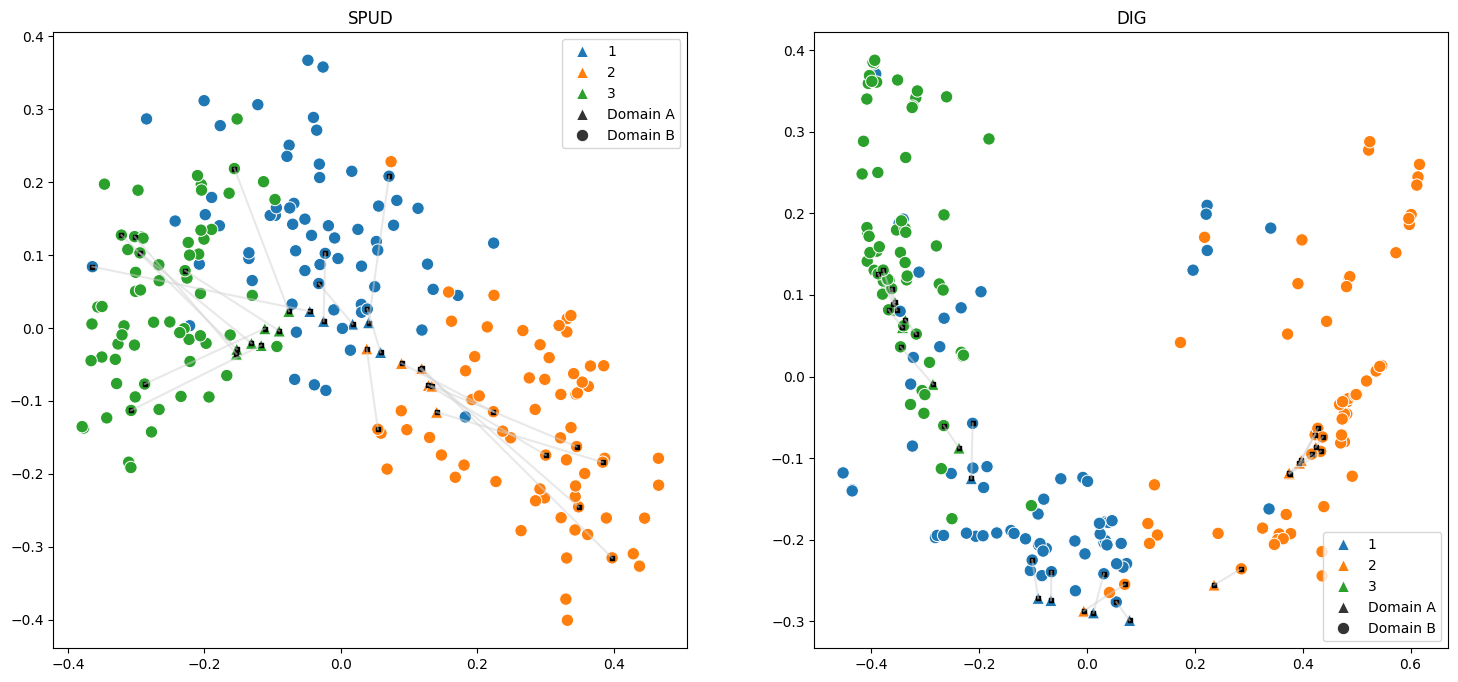

<Figure size 1400x800 with 0 Axes>

In [30]:
#Plot them side by side
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Set Title
axes[0].set_title("SPUD")
axes[1].set_title("DIG")

#Veiw the manifold. Those shown as Triangles are from GX
styles = ['Domain A' if i < sparse_spud.len_A else 'Domain B' for i in range(len(sparse_spud.emb[:]))]
plt.figure(figsize=(14, 8))

#Now plot the points
import seaborn as sns
sns.scatterplot(x = sparse_spud.emb[:, 0], y = sparse_spud.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[0])
sns.scatterplot(x = sparse_DIG.emb[:, 0], y = sparse_DIG.emb[:, 1], style = styles, hue = pd.Categorical(sparse_labels), s=80, markers= {"Domain A": "^", "Domain B" : "o"}, ax = axes[1])

#To plot line connections
for position, point in enumerate(random_points):
    axes[0].plot([sparse_spud.emb[position, 0], sparse_spud.emb[sparse_spud.len_A + point, 0]], [sparse_spud.emb[position, 1], sparse_spud.emb[sparse_spud.len_A + point, 1]], color = 'lightgrey', alpha = .5)
    axes[1].plot([sparse_DIG.emb[position, 0], sparse_DIG.emb[sparse_DIG.len_A + point, 0]], [sparse_DIG.emb[position, 1], sparse_DIG.emb[sparse_DIG.len_A + point, 1]], color = 'lightgrey', alpha = .5)

#Put black dots on the Anchors
axes[0].scatter(sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_spud.emb[sparse_spud.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")
axes[1].scatter(sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 0], sparse_DIG.emb[sparse_DIG.known_anchors + np.array([0, sparse_spud.len_A]), 1], s = 10, color = 'black', marker="s")


#Show plot
plt.show()

## Label Prediction Visualization

In [31]:
dc = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "distort", percent_of_anchors= [0.8], verbose=2, random_state=42)


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

MDS initialized with 7 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


Cross Embedding: 0.9058450145464163
Can't compute FOSCTTM with different domain shapes.


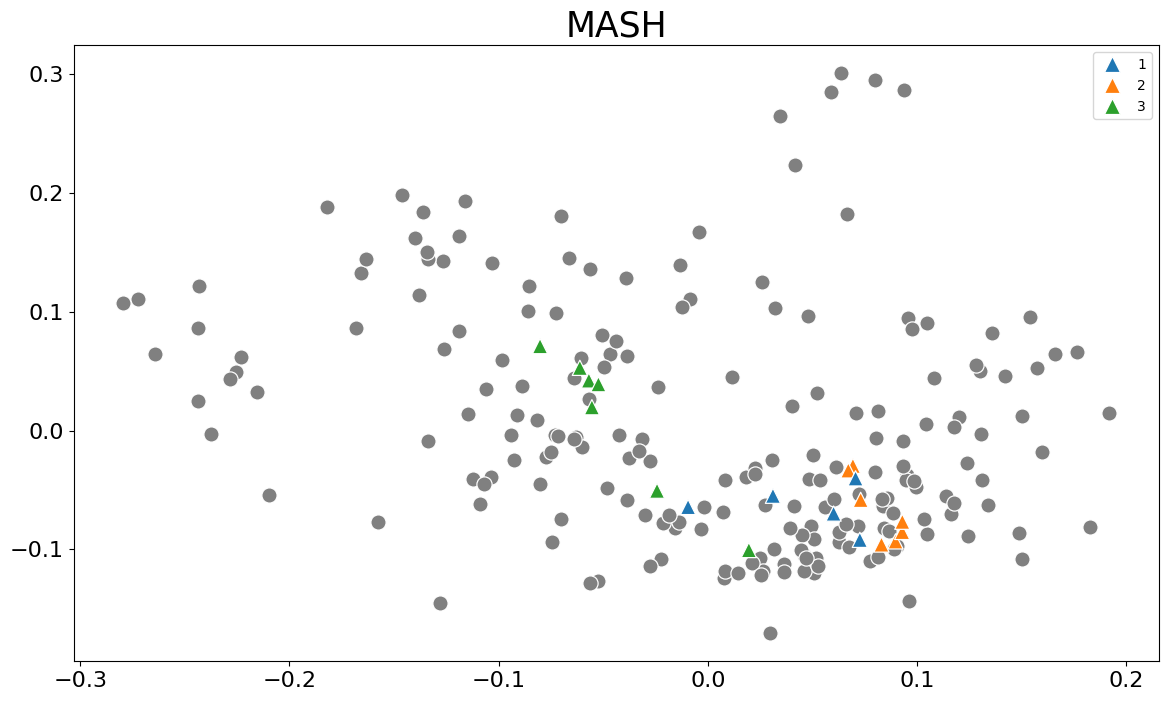

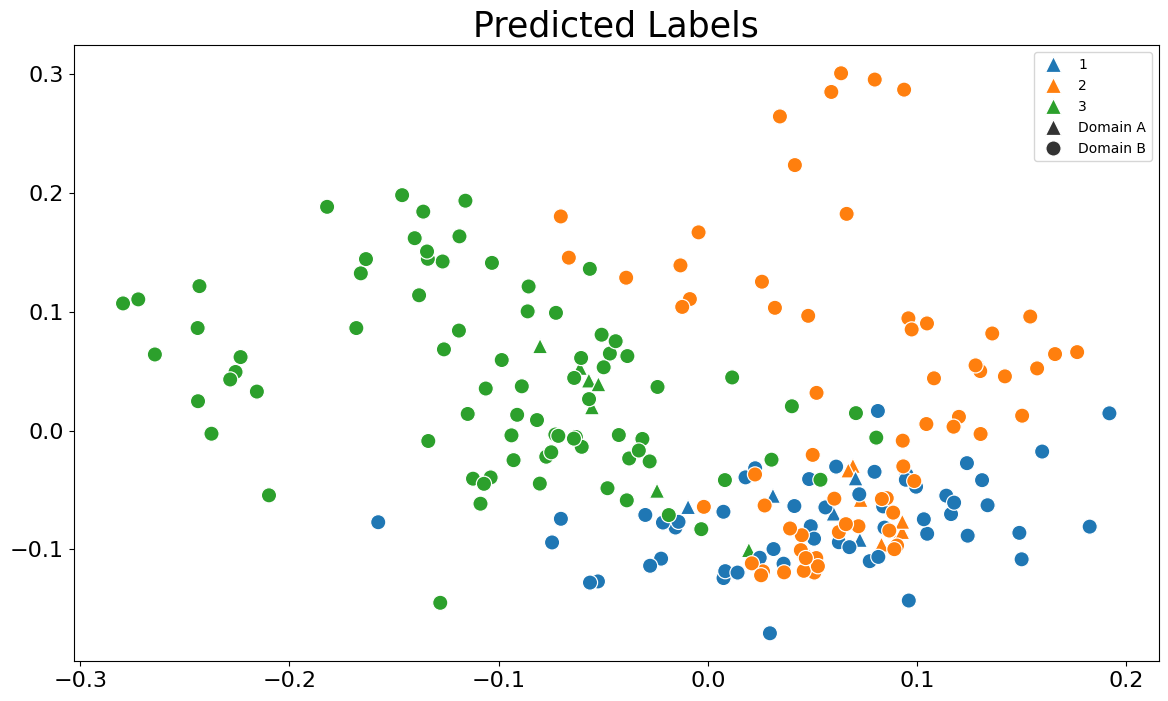

In [32]:
from MASH import MASH
LPD = MASH()
LPD.fit(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors)
LPD.plot_emb(sparse_labels, show_lines = False, show_anchors = False, show_pred = True, n_comp = 7) #Gets the embedding we can use

# Time Comparisions Below

In [35]:
"""#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df2 = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df2)

    #Count Instances
    instance_dict[csv_file] = len(df2.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df2) * len(df2.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T"""

'#Print the complexity of CSV files and the time it takes\ntime_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)\n\n#Add the amount of features for each csv file\nfor csv_file in time_df.columns:\n\n    #Continue the loop if the header is Methods\n    if csv_file == "Methods":\n\n        #Create dictionaries to store feature count and instance count\n        feature_dict = {"Methods" : 0}\n        instance_dict = {"Methods" : "Feature Count"}\n        complexity_dict = {"Methods" : "Complexity"}\n\n        continue\n\n    #Calulate the spcial cases\n    elif csv_file == "S-curve":\n        #Count Features\n        feature_dict[csv_file] = 600\n\n        #Count Instances\n        instance_dict[csv_file] = 3\n        complexity_dict[csv_file] = 1800\n\n        continue\n\n    #Calulate the spcial cases\n    elif csv_file == "blobs":\n        #Count Features\n        feature_dict[csv_file] = 300\n\n        #Count 

# Parameter Adjustment Heat map

In [36]:
import seaborn as sns
df["Percent_of_KNN"] = df["Percent_of_KNN"].round(2)

def plot_param_heat_map(parameters, method, metric = "Combined_Metric", figsize=(18, 10)):
    """ Parameters formated like ['Percent_of_KNN', 'Percent_of_Anchors']
        Metric formated like "Combined_Metric"
        Method formated like "Spud"
    """

    #Subset the data to only things we want
    df_params = subset_df(df = df, method = method)[parameters + [metric]].dropna()

    # Melt the dataframe to long format for seaborn
    df_melted = df_params.melt(id_vars=parameters, value_vars=[metric]).drop_duplicates()

    # Group by parameters and calculate the mean of 'value'
    df_mean = df_melted.groupby(parameters)['value'].mean().reset_index()

    #Create the figure
    plt.figure(figsize=figsize)

    #Create pivot table we can plot
    if len(parameters) > 3:
        df_pivot = df_mean.pivot_table(index=parameters[:2], columns=parameters[2:], values = ["value"])
        index_levels = len(df_pivot.index.levels[0]) 
    else:
        df_pivot = df_mean.pivot_table(index=parameters[:1], columns=parameters[1:], values = ["value"])
        index_levels = 0.8


    df_pivot.fillna(0, inplace = True)

    # Create the heatmap
    ax = sns.heatmap(df_pivot, annot=True, cmap='viridis')

    #Make it pretty
    plt.title(f'{method}\'s Parameter Heatmap Colored by {metric.replace("_", " ")}', fontsize = 20)
    plt.xlabel("")
    plt.ylabel("")

    if len(parameters) > 2:
        # Special art if we have multiple categories
        num_headings = len(set([index[-1] for index in df_pivot.columns]))

        #Customize x-ticks labels
        ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5)
        ax.set_xticklabels([label for label in df_pivot.columns.get_level_values(2)], rotation=90, fontsize = 13)

        # Draw a vertical black line every x columns if we have multiple categories
        for i in range(0, df_pivot.shape[1] + 1, num_headings):
            plt.axvline(x=i, color='black', linewidth = 5)

        # Add the second level of labels
        for i in range(0, df_pivot.shape[1], num_headings):
            ax.text(i + (num_headings * 0.5), (figsize[1] * index_levels)+3, df_pivot.columns.get_level_values(1)[i], ha='center', va='center', fontsize=18, rotation=0)


    if len(parameters) > 3:

        # Special art if we have four categories
        num_headings = len(set([index[-1] for index in df_pivot.index]))


        #Customize x-ticks labels
        ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5)
        ax.set_yticklabels([label for label in df_pivot.index.get_level_values(1)], rotation=0, fontsize = 13)

        # Draw a vertical black line every x columns if we have multiple categories
        for i in range(0, df_pivot.shape[0] + 1, num_headings):
            plt.axhline(y=i, color='black', linewidth = 5)

        # Add the second level of labels
        for i in range(0, df_pivot.shape[0], num_headings):
            ax.text(-4, i + (num_headings * 0.5), df_pivot.index.get_level_values(0)[i], ha='center', va='center', fontsize=18, rotation=90)

    else:
        plt.ylabel(parameters[0].replace("_", " "), fontsize = 20)
        plt.yticks(fontsize = 13)


    plt.show()
    


## Mash

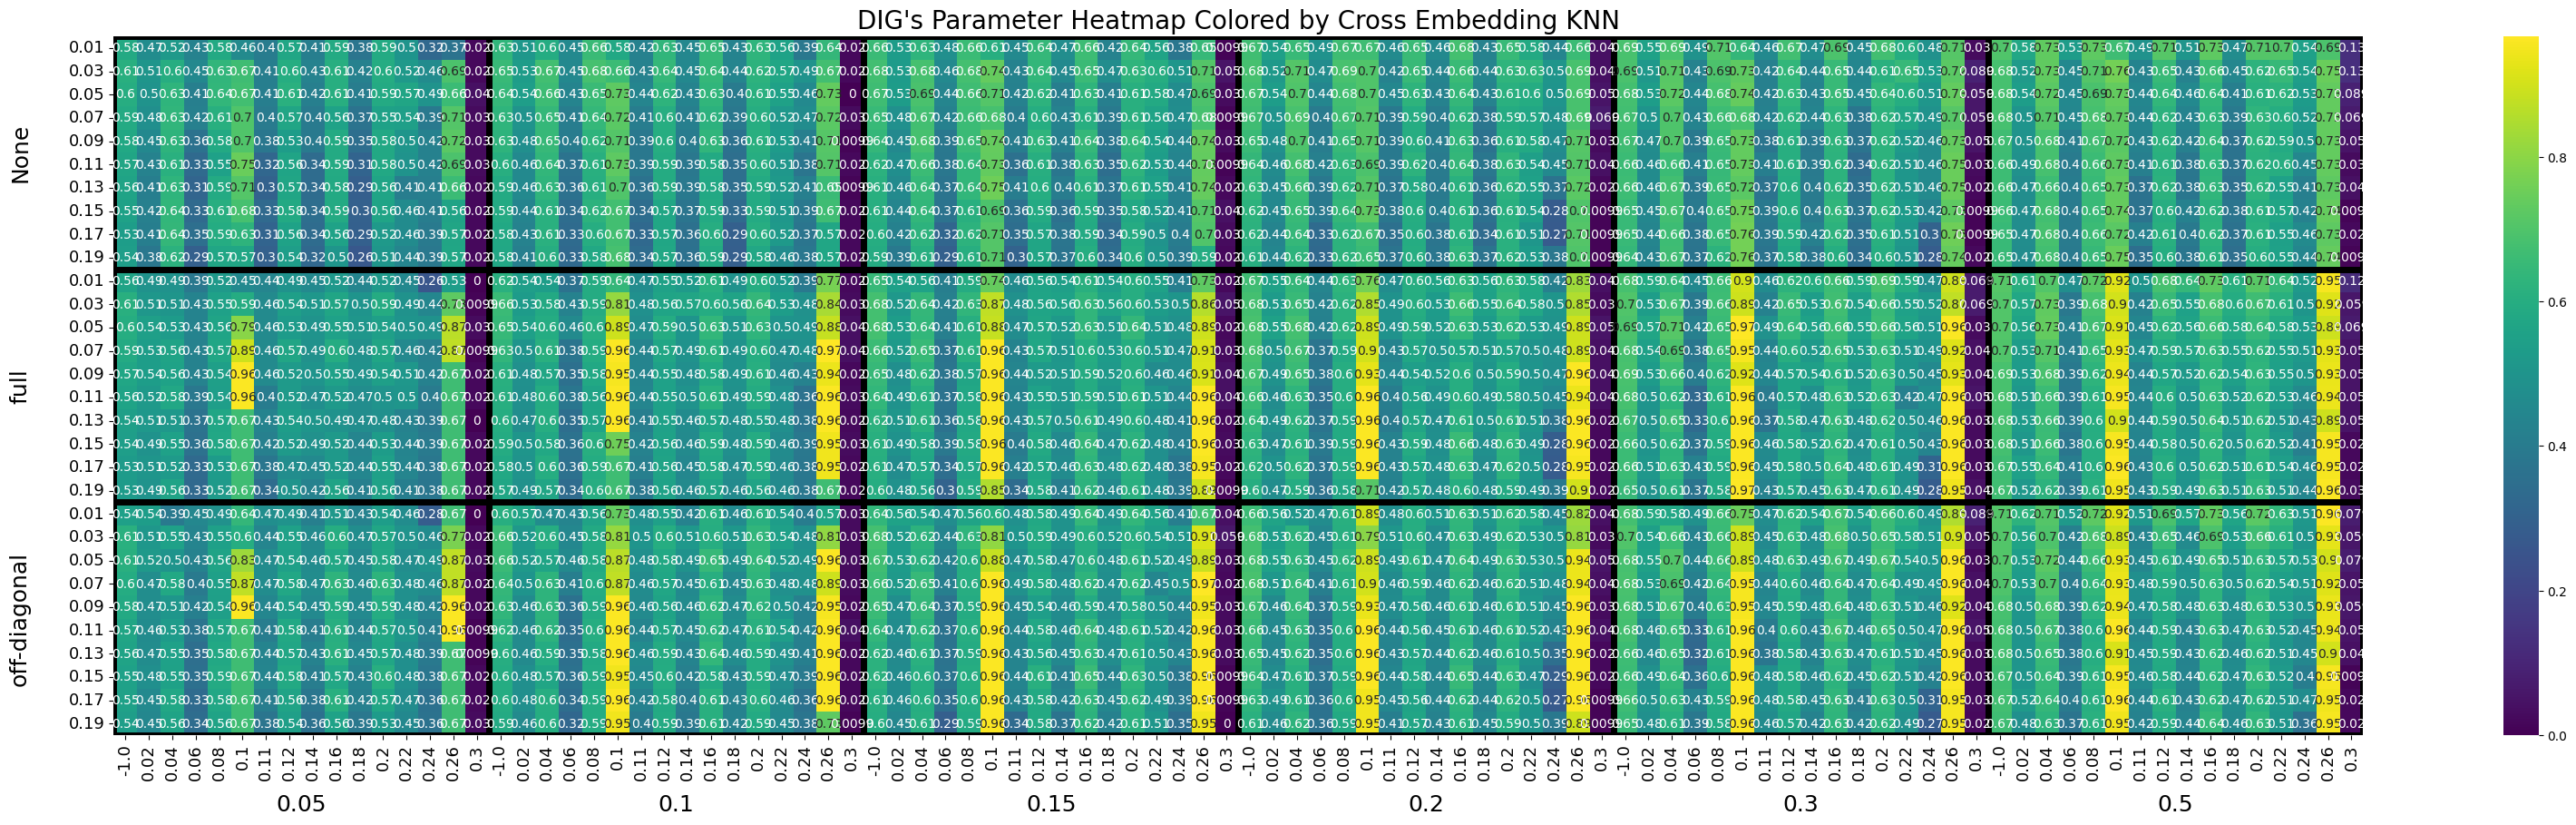

In [37]:
plot_param_heat_map([ "Page_Rank", 'Percent_of_KNN', "Percent_of_Anchors", "t_value"], "DIG", metric = "Cross_Embedding_KNN", figsize = (40, 10))

## SPUD

In [38]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 't_value', 'Predicted_Feature_MAE',
       'Operation', 'algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

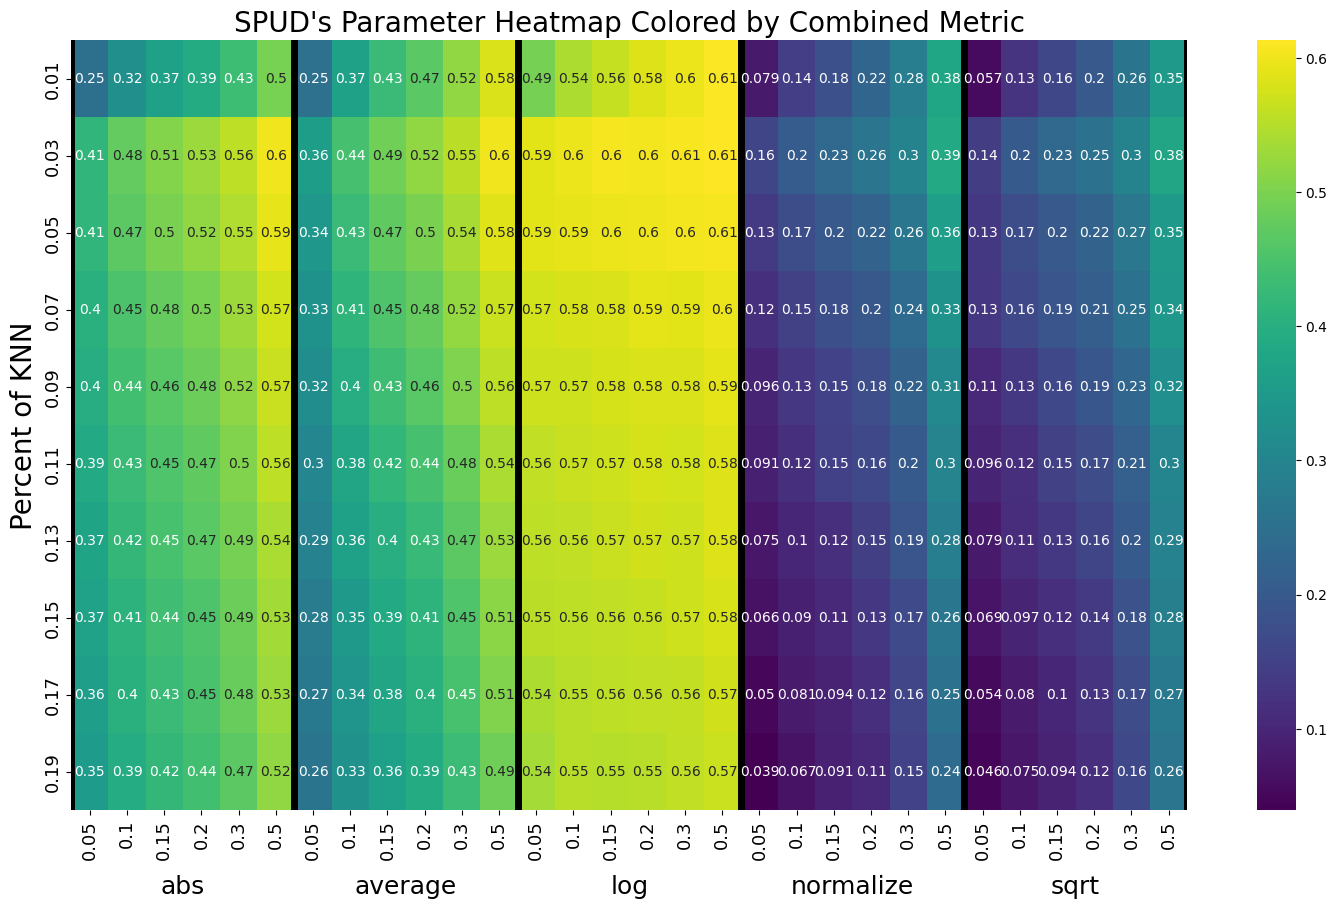

In [39]:
plot_param_heat_map(["Percent_of_KNN", "Operation", 'Percent_of_Anchors'], "SPUD" , figsize=(18, 10))

In [40]:
subset_df(df, method = "SPUD", Percent_of_Anchors = "0.2", Operation = "normalize")

Empty DataFrame
Columns: [csv_file, method, seed, split, KNN, Percent_of_KNN, Percent_of_Anchors, Page_Rank, t_value, Predicted_Feature_MAE, Operation, algorithm, FOSCTTM, Cross_Embedding_KNN, A_Classification_Score, B_Classification_Score, Combined_Metric]
Index: []